Successfully created and saved 'runtime_vs_ratio_3_panel.png'
Successfully created and saved 'steps_vs_ratio_3_panel.png'

Displaying plots on screen...


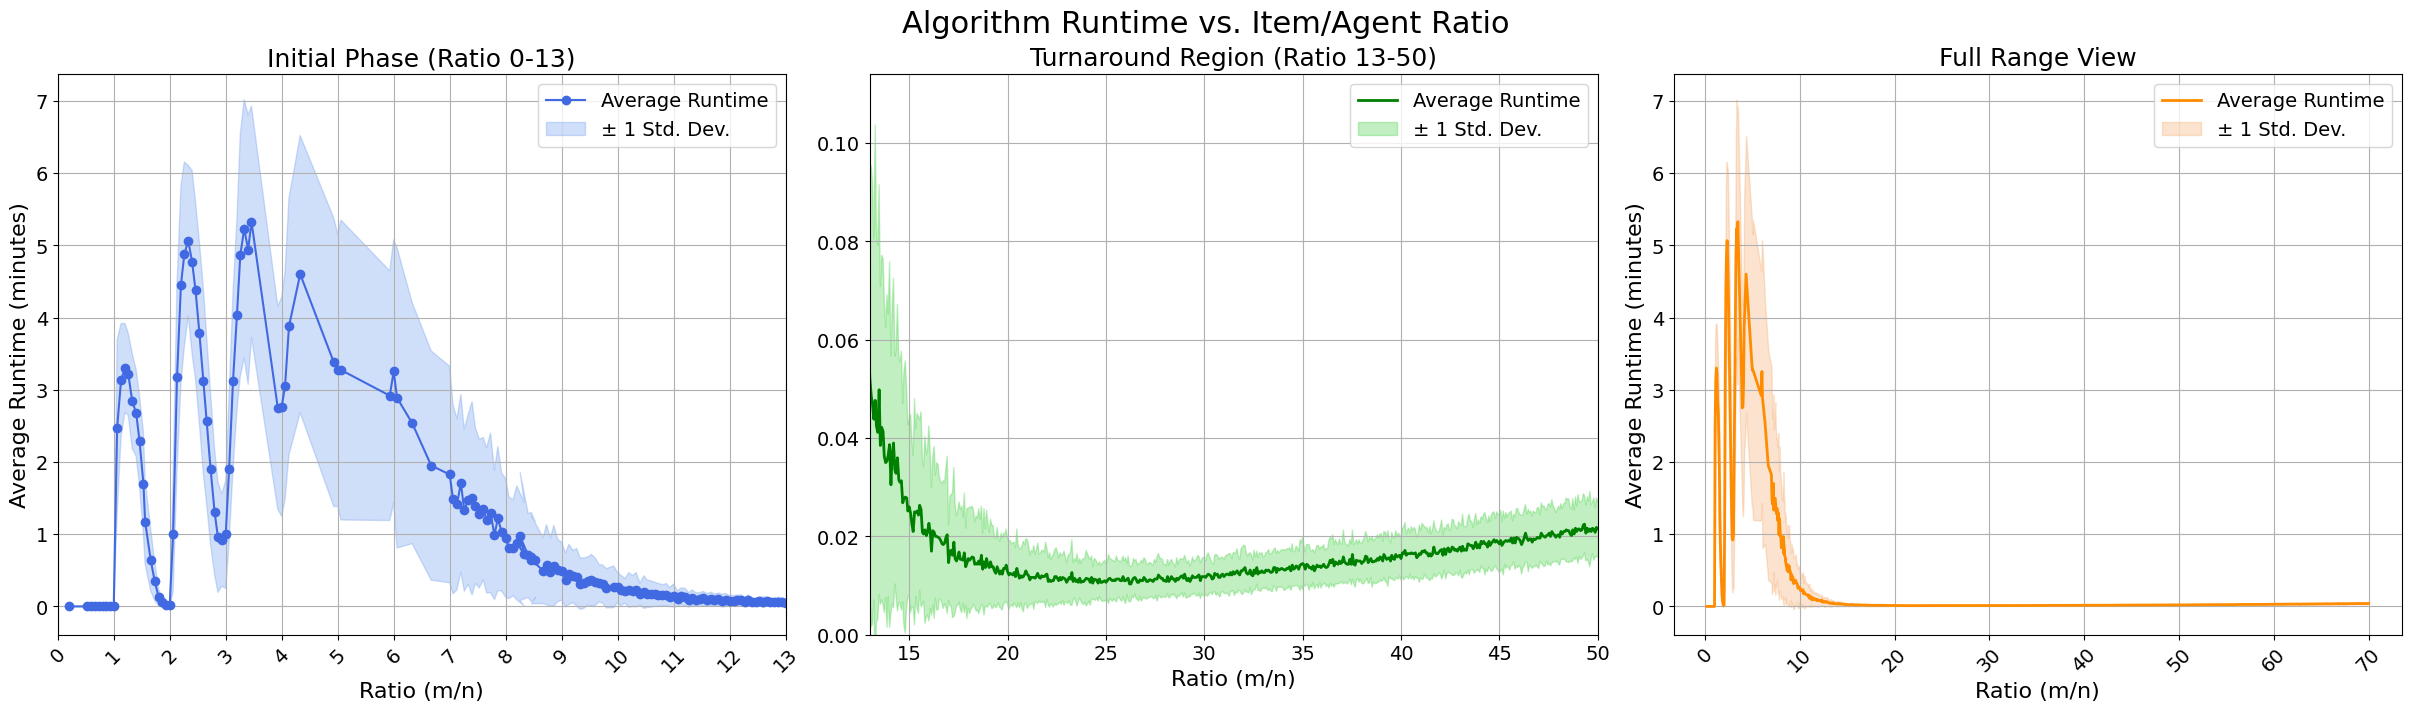

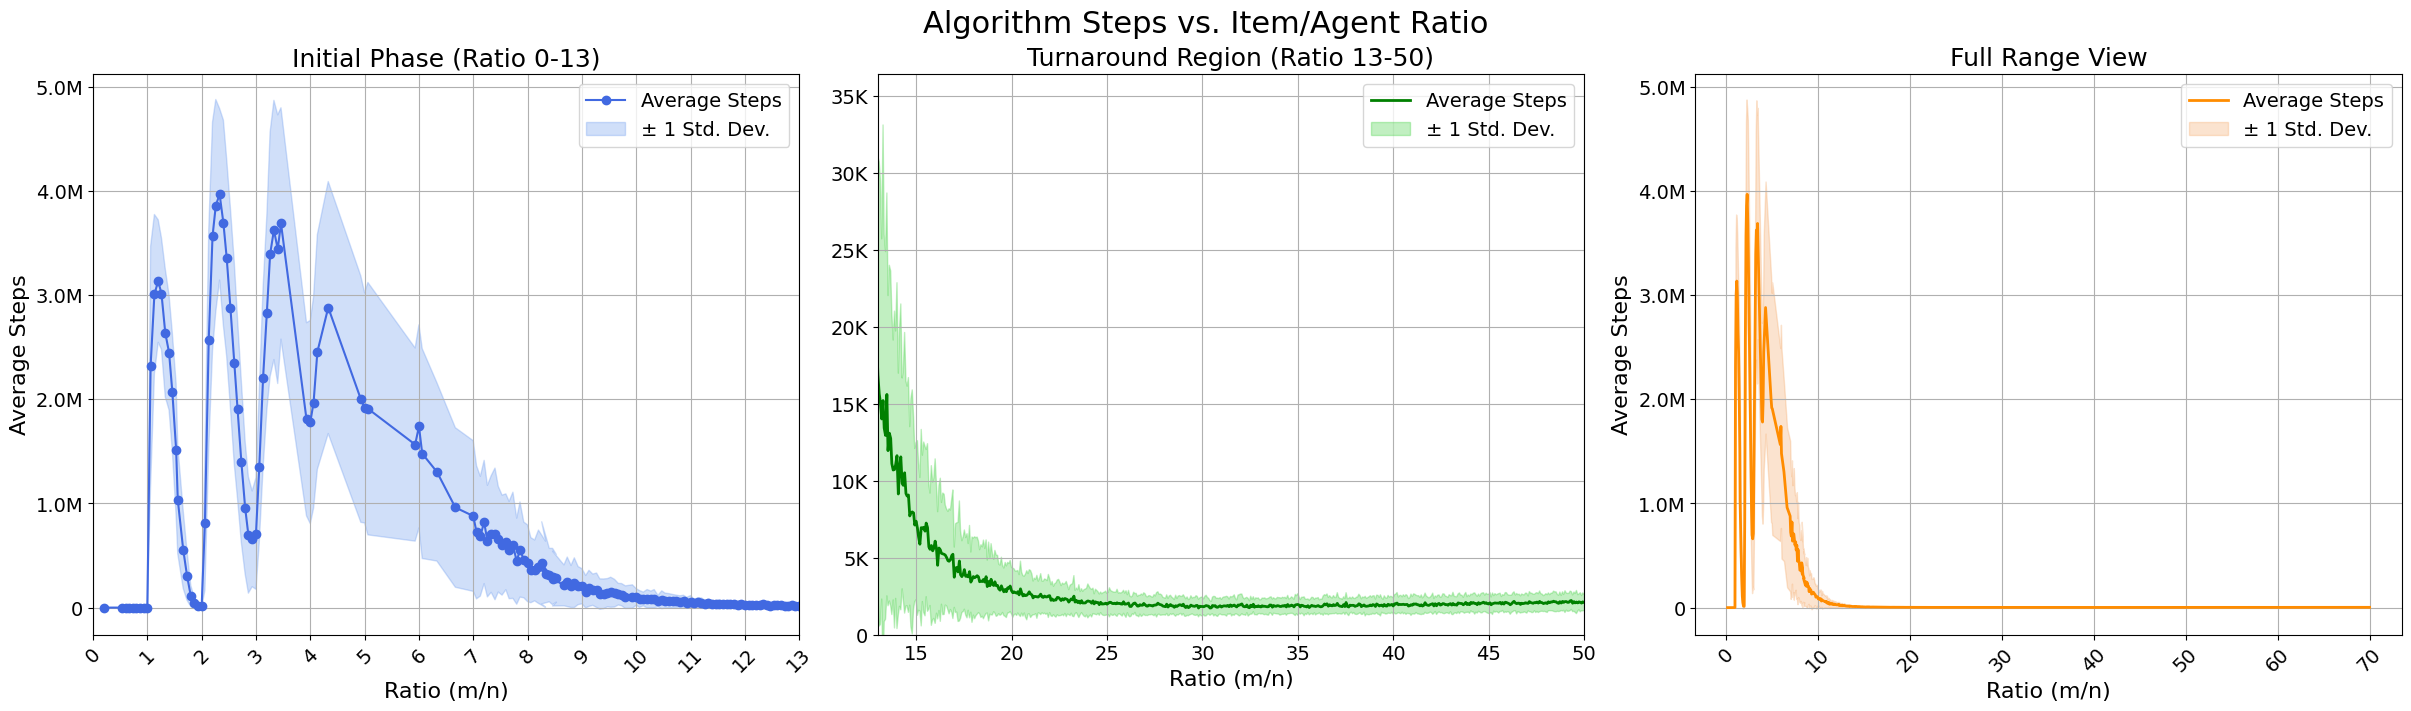

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import re

# This program contains the table (in Latex format) with average runtimes + std. dev. (as well as average number of steps + std. dev.) for n=15 agents
# where the number of items ranges from 3 to 1050. The program parses the table and plots the data.

full_latex_data = r"""
    \begin{table}[htbp]
    \centering
    \caption{For $n=15$, we investigate the runtime as a function of the ratio $m/n$.}
    \label{tab:n_15_critical_regime_full}
    \begin{tabular}{c|c|c|c|c|}
    \toprule
    \textbf{\makecell{Items ($m$)}} & \textbf{\makecell{Ratio (${m}/{n}$)}} & \makecell{\textbf{Avg. time (s) $\pm$  \textbf{Std. dev. (s)}}} & \makecell{\textbf{Avg. \# steps $\pm$ \textbf{Std. dev.}}} \\
    \hline
    {3}   & $0.2$  & \makecell{{0.0001}  {$\pm$ 7.3e-05}} & \makecell{0.41 $\pm$ 1.1} \\ \hline
    {8}   & $0.53$  & \makecell{{0.0006} {$\pm$ 0.0003}} & \makecell{8.28  $\pm$ 6.36} \\ \hline
    {9}   & $0.6$  & \makecell{{0.001} {$\pm$ 0.0009}} & \makecell{15  $\pm$ 15} \\ \hline
    {10}   & $0.66$  & \makecell{{0.001} {$\pm$ 0.0009}} & \makecell{17  $\pm$ 16} \\ \hline
    {11}   & $0.73$  & \makecell{{0.001}  {$\pm$ 0.001}} & \makecell{30  $\pm$ 23} \\ \hline
    {12}   & $0.8$  & \makecell{{0.003}  {$\pm$ 0.002}} & \makecell{47  $\pm$ 40} \\ \hline
    {13}   & $0.86$  & \makecell{{0.003}  {$\pm$ 0.002}} & \makecell{56  $\pm$ 39} \\ \hline
    {14}   & $0.93$  & \makecell{{0.006}  {$\pm$ 0.004}} & \makecell{107  $\pm$ 77} \\ \hline
    {15}   & $1$  & \makecell{{0.018}  {$\pm$ 0.015}} & \makecell{275  $\pm$ 234} \\ \hline
    {16}   & $1.06$  & \makecell{{148.25}  {$\pm$ 72.88}} & \makecell{2320734  $\pm$ 1147549} \\ \hline
    {17}   & $1.13$  & \makecell{{188}  {$\pm$ 47}} & \makecell{3009683  $\pm$ 764471} \\ \hline
    {18}   & $1.2$  & \makecell{{198.16}  {$\pm$ 36.96}} & \makecell{3134973  $\pm$ 588162} \\ \hline
    {19}   & $1.26$  & \makecell{{192.80}  {$\pm$ 34.04}} & \makecell{3013925  $\pm$ 534412} \\ \hline
    {20}   & $1.33$  & \makecell{{170.60}  {$\pm$ 39.52}} & \makecell{2636845 $\pm$ 614078} \\ \hline
    {21}   & $1.4$  & \makecell{{160.76}  {$\pm$ 35.93}} & \makecell{2447812  $\pm$ 550896} \\ \hline
    {22}   & $1.46$  & \makecell{{137.57}  {$\pm$ 37.39}} & \makecell{2070285 $\pm$ 566566} \\ \hline
    {23}   & $1.53$  & \makecell{{102.08}  {$\pm$ 42.38}} & \makecell{1516626 $\pm$ 632639} \\ \hline
    {24}   & $1.56$  & \makecell{{70.44}  {$\pm$ 35.09}} & \makecell{1034835 $\pm$ 518415} \\ \hline
    {25}   & $1.66$  & \makecell{{38.42}  {$\pm$ 25.60}} & \makecell{557702 $\pm$ 372891} \\ \hline
    {26}   & $1.73$  & \makecell{{21.47}  {$\pm$ 16.47}} & \makecell{307961 $\pm$ 236965} \\ \hline
    {27}   & $1.8$  & \makecell{{7.80} {$\pm$ 7.10}} & \makecell{110530 $\pm$ 100861} \\ \hline
    {28}   & $1.86$  & \makecell{{3.43} {$\pm$ 4.05}} & \makecell{48064 $\pm$ 56749} \\ \hline
    {29}   & $1.93$  & \makecell{{1.09} {$\pm$ 1.09}} & \makecell{15142 $\pm$ 15191} \\ \hline
    {30}   & $2$  & \makecell{0.91  $\pm$ 0.90} & \makecell{12523 $\pm$ 12413} \\ \hline
    {31}   & $2.06$  & \makecell{{60.01} {$\pm$ 47.94}} & \makecell{816389 $\pm$ 650015} \\ \hline
    {32}   & $2.13$  & \makecell{{190.76} {$\pm$ 77.64}} & \makecell{2571219 $\pm$ 1051940} \\ \hline
    {33}   & $2.2$  & \makecell{{267.27} {$\pm$ 81.83}} & \makecell{3565780 $\pm$ 1095908} \\ \hline
    {34}   & $2.26$  & \makecell{{292.53} {$\pm$ 76.78}} & \makecell{3860182  $\pm$ 1017982} \\ \hline
    {35}   & $2.33$  & \makecell{{303.94} {$\pm$ 62.64}} & \makecell{3967906 $\pm$ 823782} \\ \hline
    {36}   & $2.4$  & \makecell{{286.05} {$\pm$ 76.07}} & \makecell{3693155 $\pm$ 987215} \\ \hline
    {37}   & $2.46$  & \makecell{{262.86} {$\pm$ 73.81}} & \makecell{3361113 $\pm$ 947273} \\ \hline
    {38}   & $2.53$  & \makecell{{227.02} {$\pm$ 75.33}} & \makecell{2872206 $\pm$ 958191} \\ \hline
    {39}   & $2.6$  & \makecell{{187.49} {$\pm$ 77.18}} & \makecell{2347728 $\pm$ 970462} \\ \hline
    {40}   & $2.66$  & \makecell{{154.00} {$\pm$ 69.35}} & \makecell{1910386 $\pm$ 863810} \\ \hline
    {41}   & $2.73$  & \makecell{{113.99} {$\pm$ 62.84}} & \makecell{1401322 $\pm$ 775515} \\ \hline
    {42}   & $2.8$  & \makecell{{78.87} {$\pm$ 52.10}} & \makecell{960149 $\pm$ 636725} \\ \hline
    {43}   & $2.86$  & \makecell{{57.67} {$\pm$ 46.00}} & \makecell{696632 $\pm$ 557704} \\ \hline
    {44}   & $2.93$  & \makecell{{55.11} {$\pm$ 38.24}} & \makecell{660473  $\pm$ 459687} \\ \hline
    {45}   & $3$  & \makecell{59.81 $\pm$ 44.88} & \makecell{711243  $\pm$ 535480} \\ \hline
    {46}   & $3.06$  & \makecell{113.96 $\pm$ 61.23} & \makecell{1345999  $\pm$ 725433} \\ \hline
    {47}   & $3.13$  & \makecell{187.25 $\pm$ 73.17} & \makecell{2202434 $\pm$ 864206} \\ \hline
    {48}   & $3.2$  & \makecell{242.09 $\pm$ 79.61} & \makecell{2832068  $\pm$ 934115} \\ \hline
    {49}   & $3.26$  & \makecell{291.82 $\pm$ 100.67} & \makecell{3392186 $\pm$ 1173468} \\ \hline
    {50}   & $3.33$  & \makecell{313.94 $\pm$ 107.30} & \makecell{3625645 $\pm$ 1244260} \\ \hline
    {51}   & $3.4$  & \makecell{296.49 $\pm$ 111.96} & \makecell{3441330 $\pm$ 1289683} \\ \hline
    {52}   & $3.46$  & \makecell{319.70 $\pm$ 96.05} & \makecell{3688213  $\pm$ 1110465} \\ \hline
    {59}   & $3.93$  & \makecell{164.94 $\pm$ 84.46} & \makecell{1807851 $\pm$ 927212} \\ \hline
    {60}   & $4$  & \makecell{166.05 $\pm$ 91.11} & \makecell{1781493 $\pm$ 975468} \\ \hline
    {61}   & $4.06$  & \makecell{183.40 $\pm$ 94.43} & \makecell{1968904  $\pm$ 1014866} \\ \hline
    {62}   & $4.13$  & \makecell{232.82 $\pm$ 106.69} & \makecell{2455433 $\pm$ 1127375} \\ \hline
    {65}   & $4.33$  & \makecell{276.13 $\pm$ 115.13} & \makecell{2880757 $\pm$ 1209776} \\ \hline
    {74}   & $4.93$  & \makecell{202.87 $\pm$ 119.88} & \makecell{2001122 $\pm$ 1182465} \\ \hline
    {75}   & $5$  & \makecell{196.25 $\pm$ 113.10} & \makecell{1917454 $\pm$ 1104541} \\ \hline
    {76}   & $5.06$  & \makecell{196.42 $\pm$ 124.58} & \makecell{1909999 $\pm$ 1211647} \\ \hline
    {89}   & $5.93$  & \makecell{175.12 $\pm$ 103.74} & \makecell{1565486 $\pm$ 927117} \\ \hline
    {90}   & $6$  & \makecell{195.25 $\pm$ 109.40} & \makecell{1740054 $\pm$ 975249} \\ \hline
    {91}   & $6.06$  & \makecell{173.33$\pm$ 124.75} & \makecell{1478838 $\pm$ 1007346} \\ \hline
    {95}   & $6.33$  & \makecell{152.33 $\pm$ 100.19} & \makecell{1303622 $\pm$ 856450} \\ \hline
    {100}   & $6.67$  & \makecell{117.07 $\pm$ 95.24} & \makecell{961286  $\pm$ 765885} \\ \hline
    {105}   & $7$  & \makecell{109.63 $\pm$ 89.94} & \makecell{879170  $\pm$ 723116} \\ \hline
    {106}   & $7.06$  & \makecell{89.06 $\pm$ 78.63} & \makecell{723188 $\pm$ 639236} \\ \hline
    {107}   & $7.13$  & \makecell{84.89 $\pm$ 71.13} & \makecell{685778 $\pm$ 574958} \\ \hline
    {108}   & $7.2$  & \makecell{102.39 $\pm$ 73.69} & \makecell{821973  $\pm$ 591570} \\ \hline
    {109}   & $7.26$  & \makecell{79.99 $\pm$ 67.24} & \makecell{638460 $\pm$ 535695} \\ \hline
    {110}   & $7.33$  & \makecell{88.84 $\pm$ 70.46} & \makecell{706747  $\pm$ 560228} \\ \hline
    {111}   & $7.4$  & \makecell{89.88 $\pm$ 80.24} & \makecell{707625  $\pm$ 631788} \\ \hline
    {112}   & $7.46$  & \makecell{83.78 $\pm$ 64.68} & \makecell{656980  $\pm$ 507497} \\ \hline
    {113}   & $7.53$  & \makecell{77.08 $\pm$ 61.69} & \makecell{600115 $\pm$ 480084} \\ \hline
    {114}   & $7.6$  & \makecell{81.29 $\pm$ 59.12} & \makecell{631785 $\pm$ 459996} \\ \hline
    {115}   & $7.66$  & \makecell{71.46 $\pm$ 60.35} & \makecell{552600 $\pm$ 466953} \\ \hline
    {116}   & $7.73$  & \makecell{77.88 $\pm$ 66.30} & \makecell{598446 $\pm$ 509749} \\ \hline
    {117}   & $7.8$  & \makecell{59.28 $\pm$ 53.73} & \makecell{445776 $\pm$ 413014} \\ \hline
    {118}   & $7.86$  & \makecell{73.08 $\pm$ 59.84} & \makecell{557545 $\pm$ 456796} \\ \hline
    {119}   & $7.93$  & \makecell{61.68 $\pm$ 48.99} & \makecell{457984 $\pm$ 363404} \\ \hline
    {120}   & $8$  & \makecell{57.00 $\pm$ 49.33} & \makecell{425665 $\pm$ 368301} \\ \hline
    {121}   & $8.06$  & \makecell{48.69 $\pm$ 42.27} & \makecell{359530 $\pm$ 312274} \\ \hline
    {122}   & $8.13$  & \makecell{48.66 $\pm$ 39.74} & \makecell{357293 $\pm$ 292218} \\ \hline
    {123}   & $8.2$  & \makecell{52.84 $\pm$ 47.36} & \makecell{392768 $\pm$ 352011} \\ \hline
    {125}   & $8.33$  & \makecell{43.48 $\pm$ 43.00} & \makecell{320779 $\pm$ 317232} \\ \hline
    {124}   & $8.26$  & \makecell{58.13 $\pm$ 53.31} & \makecell{429889 $\pm$ 394053} \\ \hline
    {126}   & $8.4$  & \makecell{42.53 $\pm$ 34.97} & \makecell{312123 $\pm$ 256573} \\ \hline
    {127}   & $8.46$  & \makecell{40.90 $\pm$ 37.00} & \makecell{298518 $\pm$ 270227} \\ \hline
    {128}   & $8.53$  & \makecell{38.73 $\pm$ 31.45} & \makecell{281081 $\pm$ 228369} \\ \hline
    {129}   & $8.46$  & \makecell{38.69 $\pm$ 36.52} & \makecell{278817 $\pm$ 263255} \\ \hline
    {130}   & $8.67$  & \makecell{29.78 $\pm$ 27.40} & \makecell{213634 $\pm$ 196541} \\ \hline
    {131}   & $8.73$  & \makecell{34.68 $\pm$ 33.23} & \makecell{247820 $\pm$ 237550} \\ \hline
    {132}   & $8.8$  & \makecell{28.57 $\pm$ 28.41} & \makecell{203035 $\pm$ 201823} \\ \hline
    {133}   & $8.86$  & \makecell{33.79 $\pm$ 33.65} & \makecell{239416 $\pm$ 238559} \\ \hline
    {134}   & $8.93$  & \makecell{29.88 $\pm$ 25.84} & \makecell{211243 $\pm$ 182805} \\ \hline
    {135}   & $9.0$  & \makecell{29.24 $\pm$ 24.05} & \makecell{205219 $\pm$ 168834} \\ \hline
    {136}   & $9.07$  & \makecell{21.95 $\pm$ 22.37} & \makecell{152932 $\pm$ 156035} \\ \hline
    {137}   & $9.13$  & \makecell{26.64 $\pm$ 24.97} & \makecell{184979 $\pm$ 173333} \\ \hline
    {138}   & $9.2$  & \makecell{24.90 $\pm$ 21.74} & \makecell{172307 $\pm$ 150305} \\ \hline
    {139}   & $9.27$  & \makecell{24.14 $\pm$ 23.88} & \makecell{166802 $\pm$ 164975} \\ \hline
    {140}   & $9.33$  & \makecell{18.98 $\pm$ 21.36} & \makecell{129954 $\pm$ 146071} \\ \hline
    {141}   & $9.4$  & \makecell{19.42 $\pm$ 20.92} & \makecell{132416 $\pm$ 142703} \\ \hline
    {142}   & $9.47$  & \makecell{21.07 $\pm$ 19.96} & \makecell{143191 $\pm$ 135600} \\ \
    {143}   & $9.53$  & \makecell{21.89 $\pm$ 21.40} & \makecell{147682 $\pm$ 144376} \\ \hline
    {144}   & $9.6$  & \makecell{20.54 $\pm$ 19.72} & \makecell{138466 $\pm$ 132922} \\ \hline
    {145}   & $9.67$  & \makecell{19.20 $\pm$ 15.48} & \makecell{128831 $\pm$ 103831} \\ \hline
    {146}   & $9.73$  & \makecell{18.64 $\pm$ 15.88} & \makecell{124638 $\pm$ 106495} \\ \hline
    {147}   & $9.8$  & \makecell{15.12 $\pm$ 16.30} & \makecell{100509 $\pm$ 108603} \\ \hline
    {149}   & $9.93$  & \makecell{16.28 $\pm$ 17.31} & \makecell{106131 $\pm$ 112812} \\ \hline
    {150}  & $10$ & \makecell{15.75 $\pm$ 12.30}  & \makecell{102067 $\pm$ 79851}  \\ \hline
    {151}  & $10.06$ & \makecell{13.26 $\pm$ 12.61}  & \makecell{83056 $\pm$ 80894}  \\ \hline
    {152}  & $10.13$ & \makecell{12.95 $\pm$ 10.27}  & \makecell{83056 $\pm$ 65825}  \\ \hline
    {153}   & $10.2$  & \makecell{13.64 $\pm$ 14.35} & \makecell{84771 $\pm$ 88930} \\ \hline
    {154}   & $10.27$  & \makecell{12.80 $\pm$ 12.86} & \makecell{78999 $\pm$ 79466} \\ \hline
    {155}   & $10.33$  & \makecell{13.92 $\pm$ 14.31} & \makecell{85530 $\pm$ 87804} \\ \hline
    {156}   & $10.4$  & \makecell{10.37 $\pm$ 9.01} & \makecell{63146 $\pm$ 54926} \\ \hline
    {157}   & $10.47$  & \makecell{11.91 $\pm$ 13.55} & \makecell{75310 $\pm$ 85596} \\ \hline
    {158}   & $10.53$  & \makecell{10.54 $\pm$ 11.32} & \makecell{66994 $\pm$ 72203} \\ \hline
    {159}   & $10.6$  & \makecell{10.29 $\pm$ 10.93} & \makecell{65177 $\pm$ 69320} \\ \hline
    {160}   & $10.67$  & \makecell{10.02 $\pm$ 9.94} & \makecell{63357 $\pm$ 62986} \\ \hline
    {161}   & $10.73$  & \makecell{9.54 $\pm$ 9.55} & \makecell{60087 $\pm$ 60172} \\ \hline
    {162}   & $10.8$  & \makecell{9.33 $\pm$ 8.77} & \makecell{58478 $\pm$ 55024} \\ \hline
    {163}   & $10.87$  & \makecell{9.63 $\pm$ 9.37} & \makecell{60211 $\pm$ 58506} \\ \hline
    {164}   & $10.93$  & \makecell{7.85 $\pm$ 7.97} & \makecell{48883 $\pm$ 49726} \\ \hline
    {165}   & $11.0$  & \makecell{9.07 $\pm$ 9.52} & \makecell{56347 $\pm$ 59152} \\ \hline
    {166}   & $11.07$  & \makecell{6.49 $\pm$ 6.45} & \makecell{40073 $\pm$ 39840} \\ \hline
    {167}   & $11.13$  & \makecell{8.26 $\pm$ 6.96} & \makecell{50680 $\pm$ 42603} \\ \hline
    {168}   & $11.2$  & \makecell{7.95 $\pm$ 7.28} & \makecell{48701 $\pm$ 44651} \\ \hline
    {169}   & $11.27$  & \makecell{5.40 $\pm$ 5.98} & \makecell{32717 $\pm$ 36277} \\ \hline
    {170}   & $11.33$  & \makecell{7.20 $\pm$ 6.52} & \makecell{43218 $\pm$ 39213} \\ \hline
    {171}   & $11.4$  & \makecell{5.76 $\pm$ 5.50} & \makecell{34486 $\pm$ 32889} \\ \hline
    {172}   & $11.47$  & \makecell{5.81 $\pm$ 5.65} & \makecell{34588 $\pm$ 33586} \\ \hline
    {173}   & $11.53$  & \makecell{6.64 $\pm$ 5.86} & \makecell{39392 $\pm$ 34808} \\ \hline
    {174}   & $11.6$  & \makecell{5.51 $\pm$ 5.21} & \makecell{32427 $\pm$ 30716} \\ \hline
    {175}   & $11.67$  & \makecell{6.03 $\pm$ 5.76} & \makecell{35285 $\pm$ 33820} \\ \hline
    {176}   & $11.73$  & \makecell{5.22 $\pm$ 5.07} & \makecell{30438 $\pm$ 29685} \\ \hline
    {177}   & $11.8$  & \makecell{5.86 $\pm$ 5.24} & \makecell{33952 $\pm$ 30420} \\ \hline
    {178}   & $11.87$  & \makecell{4.84 $\pm$ 5.36} & \makecell{28053 $\pm$ 31238} \\ \hline
    {179}   & $11.93$  & \makecell{5.34 $\pm$ 5.45} & \makecell{30776 $\pm$ 31463} \\ \hline
    {180}   & $12.0$  & \makecell{4.73 $\pm$ 4.35} & \makecell{27216 $\pm$ 25056} \\ \hline
    {181}   & $12.07$  & \makecell{4.64 $\pm$ 4.51} & \makecell{26605 $\pm$ 25899} \\ \hline
    {182}   & $12.13$  & \makecell{5.00 $\pm$ 4.27} & \makecell{28541 $\pm$ 24434} \\ \hline
    {183}   & $12.2$  & \makecell{4.95 $\pm$ 4.80} & \makecell{28114 $\pm$ 27332} \\ \hline
    {184}   & $12.27$  & \makecell{4.09 $\pm$ 3.35} & \makecell{23231 $\pm$ 19021} \\ \hline
    {185}   & $12.33$  & \makecell{5.30 $\pm$ 4.34} & \makecell{29992 $\pm$ 24599} \\ \hline
    {186}   & $12.4$  & \makecell{3.68 $\pm$ 3.19} & \makecell{20765 $\pm$ 17959} \\ \hline
    {187}   & $12.47$  & \makecell{3.49 $\pm$ 3.14} & \makecell{19570 $\pm$ 17688} \\ \hline
    {188}   & $12.53$  & \makecell{4.11 $\pm$ 3.62} & \makecell{23070 $\pm$ 20313} \\ \hline
    {189}   & $12.6$  & \makecell{3.67 $\pm$ 4.42} & \makecell{20477 $\pm$ 24802} \\ \hline
    {190}   & $12.67$  & \makecell{4.12 $\pm$ 3.42} & \makecell{22890 $\pm$ 19025} \\ \hline
    {191}   & $12.73$  & \makecell{3.52 $\pm$ 3.32} & \makecell{19442 $\pm$ 18418} \\ \hline
    {192}   & $12.8$  & \makecell{3.50 $\pm$ 3.24} & \makecell{19196 $\pm$ 17783} \\ \hline
    {193}   & $12.87$  & \makecell{3.96 $\pm$ 3.78} & \makecell{21701 $\pm$ 20800} \\ \hline
    {194}   & $12.93$  & \makecell{3.53 $\pm$ 3.52} & \makecell{19261 $\pm$ 19307} \\ \hline
    {195}   & $13.0$  & \makecell{3.12 $\pm$ 2.61} & \makecell{16887 $\pm$ 14183} \\ \hline
    {196}   & $13.07$  & \makecell{2.91 $\pm$ 2.81} & \makecell{15656 $\pm$ 15087} \\ \hline
    {197}   & $13.13$  & \makecell{2.82 $\pm$ 2.69} & \makecell{15125 $\pm$ 14458} \\ \hline
    {198}   & $13.2$  & \makecell{2.63 $\pm$ 2.20} & \makecell{14028 $\pm$ 11705} \\ \hline
    {199}   & $13.27$  & \makecell{2.86 $\pm$ 3.36} & \makecell{15225 $\pm$ 17910} \\ \hline
    {200}   & $13.33$  & \makecell{2.55 $\pm$ 2.40} & \makecell{13434 $\pm$ 12582} \\ \hline
    {201}   & $13.4$  & \makecell{2.47 $\pm$ 2.28} & \makecell{12956 $\pm$ 11949} \\ \hline
    {202}   & $13.47$  & \makecell{2.99 $\pm$ 2.50} & \makecell{15622 $\pm$ 13091} \\ \hline
    {203}   & $13.53$  & \makecell{2.31 $\pm$ 1.94} & \makecell{11969 $\pm$ 10082} \\ \hline
    {204}   & $13.6$  & \makecell{2.53 $\pm$ 2.10} & \makecell{13104 $\pm$ 10911} \\ \hline
    {205}   & $13.67$  & \makecell{2.48 $\pm$ 2.11} & \makecell{12763 $\pm$ 10885} \\ \hline
    {206}   & $13.73$  & \makecell{2.18 $\pm$ 1.91} & \makecell{11123 $\pm$ 9807} \\ \hline
    {207}   & $13.8$  & \makecell{2.10 $\pm$ 1.65} & \makecell{10711 $\pm$ 8445} \\ \hline
    {208}   & $13.87$  & \makecell{2.12 $\pm$ 2.03} & \makecell{10740 $\pm$ 10294} \\ \hline
    {209}   & $13.93$  & \makecell{2.19 $\pm$ 1.72} & \makecell{11056 $\pm$ 8689} \\ \hline
    {210}   & $14.0$  & \makecell{2.32 $\pm$ 2.23} & \makecell{11642 $\pm$ 11240} \\ \hline
    {211}   & $14.07$  & \makecell{1.83 $\pm$ 1.57} & \makecell{9151 $\pm$ 7851} \\ \hline
    {212}   & $14.13$  & \makecell{2.18 $\pm$ 1.80} & \makecell{10826 $\pm$ 8975} \\ \hline
    {213}   & $14.2$  & \makecell{2.34 $\pm$ 2.01} & \makecell{11564 $\pm$ 9938} \\ \hline
    {214}   & $14.27$  & \makecell{2.01 $\pm$ 1.39} & \makecell{9840 $\pm$ 6852} \\ \hline
    {215}   & $14.33$  & \makecell{1.97 $\pm$ 1.50} & \makecell{9715 $\pm$ 7430} \\ \hline
    {216}   & $14.4$  & \makecell{2.16 $\pm$ 1.87} & \makecell{10529 $\pm$ 9120} \\ \hline
    {217}   & $14.47$  & \makecell{1.89 $\pm$ 1.50} & \makecell{9181 $\pm$ 7311} \\ \hline
    {218}   & $14.53$  & \makecell{1.86 $\pm$ 1.47} & \makecell{9021 $\pm$ 7137} \\ \hline
    {219}   & $14.6$  & \makecell{1.88 $\pm$ 1.58} & \makecell{9087 $\pm$ 7629} \\ \hline
    {220}   & $14.67$  & \makecell{1.61 $\pm$ 1.21} & \makecell{7725 $\pm$ 5801} \\ \hline
    {221}   & $14.73$  & \makecell{1.66 $\pm$ 1.55} & \makecell{7927 $\pm$ 7419} \\ \hline
    {222}   & $14.8$  & \makecell{1.68 $\pm$ 1.66} & \makecell{7987 $\pm$ 7931} \\ \hline
    {223}   & $14.87$  & \makecell{1.67 $\pm$ 1.31} & \makecell{7920 $\pm$ 6232} \\ \hline
    {224}   & $14.93$  & \makecell{1.51 $\pm$ 1.05} & \makecell{7133 $\pm$ 4977} \\ \hline
    {225}   & $15.0$  & \makecell{1.56 $\pm$ 1.08} & \makecell{7384 $\pm$ 5110} \\ \hline
    {226}   & $15.07$  & \makecell{1.48 $\pm$ 1.21} & \makecell{6943 $\pm$ 5676} \\ \hline
    {227}   & $15.13$  & \makecell{1.36 $\pm$ 1.02} & \makecell{6378 $\pm$ 4791} \\ \hline
    {228}   & $15.2$  & \makecell{1.26 $\pm$ 0.93} & \makecell{5887 $\pm$ 4335} \\ \hline
    {229}   & $15.27$  & \makecell{1.50 $\pm$ 1.38} & \makecell{6963 $\pm$ 6384} \\ \hline
    {230}   & $15.33$  & \makecell{1.49 $\pm$ 1.02} & \makecell{6916 $\pm$ 4755} \\ \hline
    {231}   & $15.4$  & \makecell{1.51 $\pm$ 1.19} & \makecell{6986 $\pm$ 5542} \\ \hline
    {232}   & $15.47$  & \makecell{1.46 $\pm$ 1.20} & \makecell{6736 $\pm$ 5501} \\ \hline
    {233}   & $15.53$  & \makecell{1.58 $\pm$ 1.04} & \makecell{7261 $\pm$ 4785} \\ \hline
    {234}   & $15.6$  & \makecell{1.53 $\pm$ 1.19} & \makecell{6974 $\pm$ 5448} \\ \hline
    {235}   & $15.67$  & \makecell{1.25 $\pm$ 0.88} & \makecell{5715 $\pm$ 4033} \\ \hline
    {236}   & $15.73$  & \makecell{1.23 $\pm$ 0.82} & \makecell{5555 $\pm$ 3652} \\ \hline
    {237}   & $15.8$  & \makecell{1.28 $\pm$ 1.14} & \makecell{5803 $\pm$ 5189} \\ \hline
    {238}   & $15.87$  & \makecell{1.21 $\pm$ 0.99} & \makecell{5458 $\pm$ 4472} \\ \hline
    {239}   & $15.93$  & \makecell{1.25 $\pm$ 1.01} & \makecell{5623 $\pm$ 4559} \\ \hline
    {240}   & $16.0$  & \makecell{1.36 $\pm$ 1.19} & \makecell{6087 $\pm$ 5346} \\ \hline
    {241}   & $16.07$  & \makecell{1.25 $\pm$ 0.93} & \makecell{5574 $\pm$ 4171} \\ \hline
    {242}   & $16.13$  & \makecell{1.02 $\pm$ 0.78} & \makecell{4517 $\pm$ 3485} \\ \hline
    {243}   & $16.2$  & \makecell{1.27 $\pm$ 0.91} & \makecell{5641 $\pm$ 4065} \\ \hline
    {244}   & $16.27$  & \makecell{1.25 $\pm$ 1.05} & \makecell{5525 $\pm$ 4650} \\ \hline
    {245}   & $16.33$  & \makecell{1.20 $\pm$ 0.75} & \makecell{5294 $\pm$ 3308} \\ \hline
    {246}   & $16.4$  & \makecell{1.20 $\pm$ 0.90} & \makecell{5261 $\pm$ 3952} \\ \hline
    {247}   & $16.47$  & \makecell{1.19 $\pm$ 0.88} & \makecell{5229 $\pm$ 3904} \\ \hline
    {248}   & $16.53$  & \makecell{1.18 $\pm$ 0.74} & \makecell{5179 $\pm$ 3250} \\ \hline
    {249}   & $16.6$  & \makecell{1.15 $\pm$ 0.72} & \makecell{5022 $\pm$ 3145} \\ \hline
    {250}   & $16.67$  & \makecell{1.11 $\pm$ 0.73} & \makecell{4816 $\pm$ 3204} \\ \hline
    {251}   & $16.73$  & \makecell{1.10 $\pm$ 0.78} & \makecell{4779 $\pm$ 3415} \\ \hline
    {252}   & $16.8$  & \makecell{1.12 $\pm$ 0.74} & \makecell{4875 $\pm$ 3233} \\ \hline
    {253}   & $16.87$  & \makecell{1.19 $\pm$ 0.85} & \makecell{5152 $\pm$ 3689} \\ \hline
    {254}   & $16.93$  & \makecell{1.22 $\pm$ 0.96} & \makecell{5236 $\pm$ 4178} \\ \hline
    {255}   & $17.0$  & \makecell{0.88 $\pm$ 0.46} & \makecell{3741 $\pm$ 1959} \\ \hline
    {256}   & $17.07$  & \makecell{1.02 $\pm$ 0.67} & \makecell{4336 $\pm$ 2887} \\ \hline
    {257}   & $17.13$  & \makecell{1.03 $\pm$ 0.68} & \makecell{4377 $\pm$ 2898} \\ \hline
    {258}   & $17.2$  & \makecell{0.97 $\pm$ 0.76} & \makecell{4086 $\pm$ 3221} \\ \hline
    {259}   & $17.27$  & \makecell{1.13 $\pm$ 0.91} & \makecell{4795 $\pm$ 3902} \\ \hline
    {260}   & $17.33$  & \makecell{0.93 $\pm$ 0.67} & \makecell{3904 $\pm$ 2839} \\ \hline
    {261}   & $17.4$  & \makecell{0.90 $\pm$ 0.55} & \makecell{3780 $\pm$ 2333} \\ \hline
    {262}   & $17.47$  & \makecell{0.94 $\pm$ 0.58} & \makecell{3941 $\pm$ 2437} \\ \hline
    {263}   & $17.53$  & \makecell{1.01 $\pm$ 0.61} & \makecell{4236 $\pm$ 2576} \\ \hline
    {264}   & $17.6$  & \makecell{0.92 $\pm$ 0.61} & \makecell{3800 $\pm$ 2517} \\ \hline
    {265}   & $17.67$  & \makecell{0.92 $\pm$ 0.65} & \makecell{3837 $\pm$ 2736} \\ \hline
    {266}   & $17.73$  & \makecell{0.91 $\pm$ 0.52} & \makecell{3762 $\pm$ 2170} \\ \hline
    {267}   & $17.8$  & \makecell{1.00 $\pm$ 0.73} & \makecell{4105 $\pm$ 3002} \\ \hline
    {268}   & $17.87$  & \makecell{0.83 $\pm$ 0.47} & \makecell{3424 $\pm$ 1955} \\ \hline
    {269}   & $17.93$  & \makecell{0.87 $\pm$ 0.67} & \makecell{3581 $\pm$ 2772} \\ \hline
    {270}   & $18.0$  & \makecell{0.93 $\pm$ 0.61} & \makecell{3784 $\pm$ 2505} \\ \hline
    {271}   & $18.07$  & \makecell{0.91 $\pm$ 0.65} & \makecell{3707 $\pm$ 2662} \\ \hline
    {272}   & $18.13$  & \makecell{0.93 $\pm$ 0.62} & \makecell{3764 $\pm$ 2543} \\ \hline
    {273}   & $18.2$  & \makecell{0.95 $\pm$ 0.62} & \makecell{3840 $\pm$ 2508} \\ \hline
    {274}   & $18.27$  & \makecell{0.94 $\pm$ 0.57} & \makecell{3765 $\pm$ 2325} \\ \hline
    {275}   & $18.33$  & \makecell{0.86 $\pm$ 0.52} & \makecell{3449 $\pm$ 2084} \\ \hline
    {276}   & $18.4$  & \makecell{0.87 $\pm$ 0.58} & \makecell{3491 $\pm$ 2362} \\ \hline
    {277}   & $18.47$  & \makecell{0.86 $\pm$ 0.56} & \makecell{3459 $\pm$ 2255} \\ \hline
    {278}   & $18.53$  & \makecell{0.90 $\pm$ 0.64} & \makecell{3598 $\pm$ 2554} \\ \hline
    {279}   & $18.6$  & \makecell{0.86 $\pm$ 0.55} & \makecell{3425 $\pm$ 2187} \\ \hline
    {280}   & $18.67$  & \makecell{0.97 $\pm$ 0.60} & \makecell{3777 $\pm$ 2391} \\ \hline
    {281}   & $18.73$  & \makecell{0.80 $\pm$ 0.44} & \makecell{3133 $\pm$ 1720} \\ \hline
    {282}   & $18.8$  & \makecell{0.89 $\pm$ 0.65} & \makecell{3463 $\pm$ 2560} \\ \hline
    {283}   & $18.87$  & \makecell{0.82 $\pm$ 0.47} & \makecell{3189 $\pm$ 1845} \\ \hline
    {284}   & $18.93$  & \makecell{0.93 $\pm$ 0.59} & \makecell{3608 $\pm$ 2315} \\ \hline
    {285}   & $19.0$  & \makecell{0.85 $\pm$ 0.51} & \makecell{3284 $\pm$ 1991} \\ \hline
    {286}   & $19.07$  & \makecell{0.82 $\pm$ 0.43} & \makecell{3202 $\pm$ 1701} \\ \hline
    {287}   & $19.13$  & \makecell{0.89 $\pm$ 0.52} & \makecell{3444 $\pm$ 2040} \\ \hline
    {288}   & $19.2$  & \makecell{0.83 $\pm$ 0.51} & \makecell{3188 $\pm$ 1990} \\ \hline
    {289}   & $19.27$  & \makecell{0.83 $\pm$ 0.50} & \makecell{3207 $\pm$ 1956} \\ \hline
    {290}   & $19.33$  & \makecell{0.78 $\pm$ 0.41} & \makecell{2987 $\pm$ 1614} \\ \hline
    {291}   & $19.4$  & \makecell{0.75 $\pm$ 0.42} & \makecell{2899 $\pm$ 1632} \\ \hline
    {292}   & $19.47$  & \makecell{0.83 $\pm$ 0.48} & \makecell{3181 $\pm$ 1858} \\ \hline
    {293}   & $19.53$  & \makecell{0.79 $\pm$ 0.40} & \makecell{2979 $\pm$ 1525} \\ \hline
    {294}   & $19.6$  & \makecell{0.74 $\pm$ 0.40} & \makecell{2793 $\pm$ 1546} \\ \hline
    {295}   & $19.67$  & \makecell{0.78 $\pm$ 0.46} & \makecell{2949 $\pm$ 1753} \\ \hline
    {296}   & $19.73$  & \makecell{0.74 $\pm$ 0.44} & \makecell{2799 $\pm$ 1679} \\ \hline
    {297}   & $19.8$  & \makecell{0.81 $\pm$ 0.43} & \makecell{3058 $\pm$ 1646} \\ \hline
    {298}   & $19.87$  & \makecell{0.81 $\pm$ 0.42} & \makecell{3031 $\pm$ 1597} \\ \hline
    {299}   & $19.93$  & \makecell{0.85 $\pm$ 0.44} & \makecell{3170 $\pm$ 1662} \\ \hline
    {300}   & $20.0$  & \makecell{0.77 $\pm$ 0.40} & \makecell{2867 $\pm$ 1514} \\ \hline
    {301}   & $20.07$  & \makecell{0.73 $\pm$ 0.42} & \makecell{2733 $\pm$ 1598} \\ \hline
    {302}   & $20.13$  & \makecell{0.75 $\pm$ 0.40} & \makecell{2792 $\pm$ 1498} \\ \hline
    {303}   & $20.2$  & \makecell{0.74 $\pm$ 0.37} & \makecell{2746 $\pm$ 1394} \\ \hline
    {304}   & $20.27$  & \makecell{0.73 $\pm$ 0.39} & \makecell{2702 $\pm$ 1447} \\ \hline
    {305}   & $20.33$  & \makecell{0.76 $\pm$ 0.37} & \makecell{2799 $\pm$ 1378} \\ \hline
    {306}   & $20.4$  & \makecell{0.71 $\pm$ 0.35} & \makecell{2596 $\pm$ 1318} \\ \hline
    {307}   & $20.47$  & \makecell{0.81 $\pm$ 0.48} & \makecell{2985 $\pm$ 1800} \\ \hline
    {308}   & $20.53$  & \makecell{0.75 $\pm$ 0.36} & \makecell{2738 $\pm$ 1330} \\ \hline
    {309}   & $20.6$  & \makecell{0.69 $\pm$ 0.36} & \makecell{2526 $\pm$ 1313} \\ \hline
    {310}   & $20.67$  & \makecell{0.72 $\pm$ 0.33} & \makecell{2616 $\pm$ 1201} \\ \hline
    {311}   & $20.73$  & \makecell{0.70 $\pm$ 0.38} & \makecell{2546 $\pm$ 1395} \\ \hline
    {312}   & $20.8$  & \makecell{0.71 $\pm$ 0.43} & \makecell{2568 $\pm$ 1593} \\ \hline
    {313}   & $20.87$  & \makecell{0.74 $\pm$ 0.36} & \makecell{2666 $\pm$ 1316} \\ \hline
    {314}   & $20.93$  & \makecell{0.78 $\pm$ 0.39} & \makecell{2792 $\pm$ 1437} \\ \hline
    {315}   & $21.0$  & \makecell{0.74 $\pm$ 0.42} & \makecell{2647 $\pm$ 1526} \\ \hline
    {316}   & $21.07$  & \makecell{0.72 $\pm$ 0.37} & \makecell{2592 $\pm$ 1352} \\ \hline
    {317}   & $21.13$  & \makecell{0.67 $\pm$ 0.30} & \makecell{2397 $\pm$ 1097} \\ \hline
    {318}   & $21.2$  & \makecell{0.70 $\pm$ 0.33} & \makecell{2493 $\pm$ 1188} \\ \hline
    {319}   & $21.27$  & \makecell{0.70 $\pm$ 0.31} & \makecell{2488 $\pm$ 1117} \\ \hline
    {320}   & $21.33$  & \makecell{0.70 $\pm$ 0.39} & \makecell{2467 $\pm$ 1397} \\ \hline
    {321}   & $21.4$  & \makecell{0.69 $\pm$ 0.29} & \makecell{2455 $\pm$ 1030} \\ \hline
    {322}   & $21.47$  & \makecell{0.72 $\pm$ 0.32} & \makecell{2534 $\pm$ 1142} \\ \hline
    {323}   & $21.53$  & \makecell{0.75 $\pm$ 0.37} & \makecell{2641 $\pm$ 1331} \\ \hline
    {324}   & $21.6$  & \makecell{0.70 $\pm$ 0.29} & \makecell{2458 $\pm$ 1029} \\ \hline
    {325}   & $21.67$  & \makecell{0.69 $\pm$ 0.30} & \makecell{2430 $\pm$ 1067} \\ \hline
    {326}   & $21.73$  & \makecell{0.72 $\pm$ 0.31} & \makecell{2518 $\pm$ 1110} \\ \hline
    {327}   & $21.8$  & \makecell{0.71 $\pm$ 0.32} & \makecell{2462 $\pm$ 1130} \\ \hline
    {328}   & $21.87$  & \makecell{0.71 $\pm$ 0.30} & \makecell{2459 $\pm$ 1060} \\ \hline
    {329}   & $21.93$  & \makecell{0.73 $\pm$ 0.40} & \makecell{2524 $\pm$ 1399} \\ \hline
    {330}   & $22.0$  & \makecell{0.74 $\pm$ 0.31} & \makecell{2543 $\pm$ 1104} \\ \hline
    {331}   & $22.07$  & \makecell{0.65 $\pm$ 0.29} & \makecell{2241 $\pm$ 1011} \\ \hline
    {332}   & $22.13$  & \makecell{0.67 $\pm$ 0.33} & \makecell{2327 $\pm$ 1138} \\ \hline
    {333}   & $22.2$  & \makecell{0.65 $\pm$ 0.27} & \makecell{2228 $\pm$ 925} \\ \hline
    {334}   & $22.27$  & \makecell{0.66 $\pm$ 0.30} & \makecell{2265 $\pm$ 1059} \\ \hline
    {335}   & $22.33$  & \makecell{0.66 $\pm$ 0.32} & \makecell{2261 $\pm$ 1114} \\ \hline
    {336}   & $22.4$  & \makecell{0.71 $\pm$ 0.33} & \makecell{2431 $\pm$ 1129} \\ \hline
    {337}   & $22.47$  & \makecell{0.71 $\pm$ 0.35} & \makecell{2416 $\pm$ 1185} \\ \hline
    {338}   & $22.53$  & \makecell{0.69 $\pm$ 0.32} & \makecell{2337 $\pm$ 1095} \\ \hline
    {339}   & $22.6$  & \makecell{0.66 $\pm$ 0.28} & \makecell{2226 $\pm$ 972} \\ \hline
    {340}   & $22.67$  & \makecell{0.70 $\pm$ 0.30} & \makecell{2343 $\pm$ 1021} \\ \hline
    {341}   & $22.73$  & \makecell{0.67 $\pm$ 0.30} & \makecell{2264 $\pm$ 1031} \\ \hline
    {342}   & $22.8$  & \makecell{0.70 $\pm$ 0.28} & \makecell{2358 $\pm$ 969} \\ \hline
    {343}   & $22.87$  & \makecell{0.69 $\pm$ 0.33} & \makecell{2322 $\pm$ 1144} \\ \hline
    {344}   & $22.93$  & \makecell{0.68 $\pm$ 0.28} & \makecell{2289 $\pm$ 947} \\ \hline
    {345}   & $23.0$  & \makecell{0.64 $\pm$ 0.24} & \makecell{2125 $\pm$ 812} \\ \hline
    {346}   & $23.07$  & \makecell{0.67 $\pm$ 0.29} & \makecell{2233 $\pm$ 987} \\ \hline
    {347}   & $23.13$  & \makecell{0.70 $\pm$ 0.28} & \makecell{2337 $\pm$ 936} \\ \hline
    {348}   & $23.2$  & \makecell{0.68 $\pm$ 0.32} & \makecell{2266 $\pm$ 1061} \\ \hline
    {349}   & $23.27$  & \makecell{0.76 $\pm$ 0.40} & \makecell{2511 $\pm$ 1335} \\ \hline
    {350}   & $23.33$  & \makecell{0.65 $\pm$ 0.23} & \makecell{2126 $\pm$ 761} \\ \hline
    {351}   & $23.4$  & \makecell{0.69 $\pm$ 0.24} & \makecell{2239 $\pm$ 798} \\ \hline
    {352}   & $23.47$  & \makecell{0.65 $\pm$ 0.25} & \makecell{2094 $\pm$ 830} \\ \hline
    {353}   & $23.53$  & \makecell{0.67 $\pm$ 0.32} & \makecell{2188 $\pm$ 1067} \\ \hline
    {354}   & $23.6$  & \makecell{0.64 $\pm$ 0.23} & \makecell{2056 $\pm$ 756} \\ \hline
    {355}   & $23.67$  & \makecell{0.69 $\pm$ 0.24} & \makecell{2218 $\pm$ 777} \\ \hline
    {356}   & $23.73$  & \makecell{0.64 $\pm$ 0.23} & \makecell{2067 $\pm$ 750} \\ \hline
    {357}   & $23.8$  & \makecell{0.65 $\pm$ 0.27} & \makecell{2071 $\pm$ 861} \\ \hline
    {358}   & $23.87$  & \makecell{0.65 $\pm$ 0.28} & \makecell{2070 $\pm$ 904} \\ \hline
    {359}   & $23.93$  & \makecell{0.67 $\pm$ 0.27} & \makecell{2150 $\pm$ 866} \\ \hline
    {360}   & $24.0$  & \makecell{0.69 $\pm$ 0.34} & \makecell{2200 $\pm$ 1103} \\ \hline
    {361}   & $24.07$  & \makecell{0.68 $\pm$ 0.30} & \makecell{2176 $\pm$ 961} \\ \hline
    {362}   & $24.13$  & \makecell{0.68 $\pm$ 0.27} & \makecell{2153 $\pm$ 859} \\ \hline
    {363}   & $24.2$  & \makecell{0.64 $\pm$ 0.28} & \makecell{2053 $\pm$ 897} \\ \hline
    {364}   & $24.27$  & \makecell{0.70 $\pm$ 0.26} & \makecell{2204 $\pm$ 827} \\ \hline
    {365}   & $24.33$  & \makecell{0.63 $\pm$ 0.20} & \makecell{2008 $\pm$ 657} \\ \hline
    {366}   & $24.4$  & \makecell{0.68 $\pm$ 0.25} & \makecell{2144 $\pm$ 818} \\ \hline
    {367}   & $24.47$  & \makecell{0.67 $\pm$ 0.25} & \makecell{2089 $\pm$ 788} \\ \hline
    {368}   & $24.53$  & \makecell{0.67 $\pm$ 0.22} & \makecell{2099 $\pm$ 703} \\ \hline
    {369}   & $24.6$  & \makecell{0.63 $\pm$ 0.22} & \makecell{1958 $\pm$ 693} \\ \hline
    {370}   & $24.67$  & \makecell{0.68 $\pm$ 0.21} & \makecell{2112 $\pm$ 670} \\ \hline
    {371}   & $24.73$  & \makecell{0.64 $\pm$ 0.21} & \makecell{2000 $\pm$ 666} \\ \hline
    {372}   & $24.8$  & \makecell{0.64 $\pm$ 0.23} & \makecell{2003 $\pm$ 736} \\ \hline
    {373}   & $24.87$  & \makecell{0.65 $\pm$ 0.24} & \makecell{2014 $\pm$ 758} \\ \hline
    {374}   & $24.93$  & \makecell{0.66 $\pm$ 0.25} & \makecell{2052 $\pm$ 785} \\ \hline
    {375}   & $25.0$  & \makecell{0.64 $\pm$ 0.22} & \makecell{1989 $\pm$ 701} \\ \hline
    {376}   & $25.07$  & \makecell{0.66 $\pm$ 0.23} & \makecell{2040 $\pm$ 724} \\ \hline
    {377}   & $25.13$  & \makecell{0.68 $\pm$ 0.30} & \makecell{2109 $\pm$ 946} \\ \hline
    {378}   & $25.2$  & \makecell{0.69 $\pm$ 0.24} & \makecell{2112 $\pm$ 758} \\ \hline
    {379}   & $25.27$  & \makecell{0.67 $\pm$ 0.25} & \makecell{2044 $\pm$ 776} \\ \hline
    {380}   & $25.33$  & \makecell{0.66 $\pm$ 0.25} & \makecell{2023 $\pm$ 761} \\ \hline
    {381}   & $25.4$  & \makecell{0.67 $\pm$ 0.23} & \makecell{2055 $\pm$ 714} \\ \hline
    {382}   & $25.47$  & \makecell{0.66 $\pm$ 0.24} & \makecell{2012 $\pm$ 760} \\ \hline
    {383}   & $25.53$  & \makecell{0.68 $\pm$ 0.28} & \makecell{2078 $\pm$ 880} \\ \hline
    {384}   & $25.6$  & \makecell{0.68 $\pm$ 0.23} & \makecell{2031 $\pm$ 682} \\ \hline
    {385}   & $25.67$  & \makecell{0.68 $\pm$ 0.22} & \makecell{2045 $\pm$ 691} \\ \hline
    {386}   & $25.73$  & \makecell{0.66 $\pm$ 0.23} & \makecell{2003 $\pm$ 711} \\ \hline
    {387}   & $25.8$  & \makecell{0.66 $\pm$ 0.25} & \makecell{1992 $\pm$ 776} \\ \hline
    {388}   & $25.87$  & \makecell{0.71 $\pm$ 0.25} & \makecell{2146 $\pm$ 748} \\ \hline
    {389}   & $25.93$  & \makecell{0.66 $\pm$ 0.24} & \makecell{1990 $\pm$ 719} \\ \hline
    {390}   & $26.0$  & \makecell{0.66 $\pm$ 0.28} & \makecell{1997 $\pm$ 864} \\ \hline
    {391}   & $26.07$  & \makecell{0.68 $\pm$ 0.19} & \makecell{2018 $\pm$ 588} \\ \hline
    {392}   & $26.13$  & \makecell{0.69 $\pm$ 0.27} & \makecell{2065 $\pm$ 822} \\ \hline
    {393}   & $26.2$  & \makecell{0.62 $\pm$ 0.22} & \makecell{1845 $\pm$ 677} \\ \hline
    {394}   & $26.27$  & \makecell{0.62 $\pm$ 0.21} & \makecell{1840 $\pm$ 623} \\ \hline
    {395}   & $26.33$  & \makecell{0.66 $\pm$ 0.19} & \makecell{1941 $\pm$ 574} \\ \hline
    {396}   & $26.4$  & \makecell{0.69 $\pm$ 0.24} & \makecell{2039 $\pm$ 727} \\ \hline
    {397}   & $26.47$  & \makecell{0.70 $\pm$ 0.20} & \makecell{2067 $\pm$ 610} \\ \hline
    {398}   & $26.53$  & \makecell{0.68 $\pm$ 0.24} & \makecell{1973 $\pm$ 722} \\ \hline
    {399}   & $26.6$  & \makecell{0.64 $\pm$ 0.21} & \makecell{1865 $\pm$ 630} \\ \hline
    {400}   & $26.67$  & \makecell{0.64 $\pm$ 0.23} & \makecell{1871 $\pm$ 700} \\ \hline
    {401}   & $26.73$  & \makecell{0.67 $\pm$ 0.20} & \makecell{1954 $\pm$ 608} \\ \hline
    {402}   & $26.8$  & \makecell{0.66 $\pm$ 0.25} & \makecell{1921 $\pm$ 728} \\ \hline
    {403}   & $26.87$  & \makecell{0.66 $\pm$ 0.22} & \makecell{1921 $\pm$ 669} \\ \hline
    {404}   & $26.93$  & \makecell{0.70 $\pm$ 0.24} & \makecell{2038 $\pm$ 692} \\ \hline
    {405}   & $27.0$  & \makecell{0.68 $\pm$ 0.24} & \makecell{1956 $\pm$ 703} \\ \hline
    {406}   & $27.07$  & \makecell{0.65 $\pm$ 0.21} & \makecell{1872 $\pm$ 610} \\ \hline
    {407}   & $27.13$  & \makecell{0.65 $\pm$ 0.21} & \makecell{1860 $\pm$ 612} \\ \hline
    {408}   & $27.2$  & \makecell{0.67 $\pm$ 0.21} & \makecell{1926 $\pm$ 624} \\ \hline
    {409}   & $27.27$  & \makecell{0.67 $\pm$ 0.21} & \makecell{1913 $\pm$ 615} \\ \hline
    {410}   & $27.33$  & \makecell{0.66 $\pm$ 0.20} & \makecell{1898 $\pm$ 573} \\ \hline
    {411}   & $27.4$  & \makecell{0.65 $\pm$ 0.20} & \makecell{1869 $\pm$ 579} \\ \hline
    {412}   & $27.47$  & \makecell{0.68 $\pm$ 0.24} & \makecell{1927 $\pm$ 687} \\ \hline
    {413}   & $27.53$  & \makecell{0.68 $\pm$ 0.20} & \makecell{1930 $\pm$ 591} \\ \hline
    {414}   & $27.6$  & \makecell{0.68 $\pm$ 0.27} & \makecell{1947 $\pm$ 794} \\ \hline
    {415}   & $27.67$  & \makecell{0.73 $\pm$ 0.26} & \makecell{2057 $\pm$ 739} \\ \hline
    {416}   & $27.73$  & \makecell{0.71 $\pm$ 0.23} & \makecell{1990 $\pm$ 648} \\ \hline
    {417}   & $27.8$  & \makecell{0.69 $\pm$ 0.24} & \makecell{1958 $\pm$ 689} \\ \hline
    {418}   & $27.87$  & \makecell{0.69 $\pm$ 0.23} & \makecell{1934 $\pm$ 654} \\ \hline
    {419}   & $27.93$  & \makecell{0.66 $\pm$ 0.20} & \makecell{1867 $\pm$ 572} \\ \hline
    {420}   & $28.0$  & \makecell{0.66 $\pm$ 0.20} & \makecell{1848 $\pm$ 555} \\ \hline
    {421}   & $28.07$  & \makecell{0.65 $\pm$ 0.19} & \makecell{1827 $\pm$ 551} \\ \hline
    {422}   & $28.13$  & \makecell{0.71 $\pm$ 0.21} & \makecell{1991 $\pm$ 603} \\ \hline
    {423}   & $28.2$  & \makecell{0.65 $\pm$ 0.20} & \makecell{1804 $\pm$ 562} \\ \hline
    {424}   & $28.27$  & \makecell{0.68 $\pm$ 0.22} & \makecell{1898 $\pm$ 630} \\ \hline
    {425}   & $28.33$  & \makecell{0.71 $\pm$ 0.21} & \makecell{1966 $\pm$ 602} \\ \hline
    {426}   & $28.4$  & \makecell{0.68 $\pm$ 0.20} & \makecell{1877 $\pm$ 566} \\ \hline
    {427}   & $28.47$  & \makecell{0.68 $\pm$ 0.18} & \makecell{1876 $\pm$ 501} \\ \hline
    {428}   & $28.53$  & \makecell{0.65 $\pm$ 0.18} & \makecell{1786 $\pm$ 505} \\ \hline
    {429}   & $28.6$  & \makecell{0.69 $\pm$ 0.25} & \makecell{1889 $\pm$ 684} \\ \hline
    {430}   & $28.67$  & \makecell{0.67 $\pm$ 0.19} & \makecell{1840 $\pm$ 524} \\ \hline
    {431}   & $28.73$  & \makecell{0.69 $\pm$ 0.22} & \makecell{1896 $\pm$ 615} \\ \hline
    {432}   & $28.8$  & \makecell{0.71 $\pm$ 0.22} & \makecell{1951 $\pm$ 602} \\ \hline
    {433}   & $28.87$  & \makecell{0.72 $\pm$ 0.20} & \makecell{1942 $\pm$ 550} \\ \hline
    {434}   & $28.93$  & \makecell{0.69 $\pm$ 0.23} & \makecell{1885 $\pm$ 614} \\ \hline
    {435}   & $29.0$  & \makecell{0.74 $\pm$ 0.23} & \makecell{1988 $\pm$ 612} \\ \hline
    {436}   & $29.07$  & \makecell{0.68 $\pm$ 0.23} & \makecell{1836 $\pm$ 627} \\ \hline
    {437}   & $29.13$  & \makecell{0.66 $\pm$ 0.21} & \makecell{1768 $\pm$ 571} \\ \hline
    {438}   & $29.2$  & \makecell{0.69 $\pm$ 0.22} & \makecell{1864 $\pm$ 599} \\ \hline
    {439}   & $29.27$  & \makecell{0.65 $\pm$ 0.19} & \makecell{1763 $\pm$ 526} \\ \hline
    {440}   & $29.33$  & \makecell{0.68 $\pm$ 0.19} & \makecell{1812 $\pm$ 515} \\ \hline
    {441}   & $29.4$  & \makecell{0.72 $\pm$ 0.23} & \makecell{1930 $\pm$ 608} \\ \hline
    {442}   & $29.47$  & \makecell{0.70 $\pm$ 0.19} & \makecell{1876 $\pm$ 514} \\ \hline
    {443}   & $29.53$  & \makecell{0.70 $\pm$ 0.21} & \makecell{1865 $\pm$ 562} \\ \hline
    {444}   & $29.6$  & \makecell{0.70 $\pm$ 0.22} & \makecell{1846 $\pm$ 578} \\ \hline
    {445}   & $29.67$  & \makecell{0.72 $\pm$ 0.25} & \makecell{1901 $\pm$ 639} \\ \hline
    {446}   & $29.73$  & \makecell{0.73 $\pm$ 0.22} & \makecell{1909 $\pm$ 588} \\ \hline
    {447}   & $29.8$  & \makecell{0.66 $\pm$ 0.22} & \makecell{1739 $\pm$ 573} \\ \hline
    {448}   & $29.87$  & \makecell{0.71 $\pm$ 0.21} & \makecell{1857 $\pm$ 542} \\ \hline
    {449}   & $29.93$  & \makecell{0.71 $\pm$ 0.23} & \makecell{1839 $\pm$ 598} \\ \hline
    {450}   & $30.0$  & \makecell{0.71 $\pm$ 0.24} & \makecell{1841 $\pm$ 622} \\ \hline
    {451}   & $30.07$  & \makecell{0.70 $\pm$ 0.20} & \makecell{1820 $\pm$ 518} \\ \hline
    {452}   & $30.13$  & \makecell{0.72 $\pm$ 0.25} & \makecell{1860 $\pm$ 644} \\ \hline
    {453}   & $30.2$  & \makecell{0.74 $\pm$ 0.26} & \makecell{1900 $\pm$ 668} \\ \hline
    {454}   & $30.27$  & \makecell{0.73 $\pm$ 0.22} & \makecell{1873 $\pm$ 545} \\ \hline
    {455}   & $30.33$  & \makecell{0.72 $\pm$ 0.20} & \makecell{1859 $\pm$ 515} \\ \hline
    {456}   & $30.4$  & \makecell{0.68 $\pm$ 0.19} & \makecell{1739 $\pm$ 477} \\ \hline
    {457}   & $30.47$  & \makecell{0.69 $\pm$ 0.17} & \makecell{1753 $\pm$ 420} \\ \hline
    {458}   & $30.53$  & \makecell{0.75 $\pm$ 0.22} & \makecell{1906 $\pm$ 543} \\ \hline
    {459}   & $30.6$  & \makecell{0.73 $\pm$ 0.25} & \makecell{1861 $\pm$ 638} \\ \hline
    {460}   & $30.67$  & \makecell{0.74 $\pm$ 0.23} & \makecell{1895 $\pm$ 582} \\ \hline
    {461}   & $30.73$  & \makecell{0.70 $\pm$ 0.22} & \makecell{1799 $\pm$ 569} \\ \hline
    {462}   & $30.8$  & \makecell{0.70 $\pm$ 0.24} & \makecell{1788 $\pm$ 593} \\ \hline
    {463}   & $30.87$  & \makecell{0.73 $\pm$ 0.21} & \makecell{1838 $\pm$ 519} \\ \hline
    {464}   & $30.93$  & \makecell{0.74 $\pm$ 0.21} & \makecell{1886 $\pm$ 534} \\ \hline
    {465}   & $31.0$  & \makecell{0.71 $\pm$ 0.20} & \makecell{1803 $\pm$ 499} \\ \hline
    {466}   & $31.07$  & \makecell{0.73 $\pm$ 0.23} & \makecell{1856 $\pm$ 567} \\ \hline
    {467}   & $31.13$  & \makecell{0.74 $\pm$ 0.23} & \makecell{1881 $\pm$ 578} \\ \hline
    {468}   & $31.2$  & \makecell{0.74 $\pm$ 0.24} & \makecell{1874 $\pm$ 596} \\ \hline
    {469}   & $31.27$  & \makecell{0.73 $\pm$ 0.26} & \makecell{1858 $\pm$ 645} \\ \hline
    {470}   & $31.33$  & \makecell{0.76 $\pm$ 0.23} & \makecell{1910 $\pm$ 557} \\ \hline
    {471}   & $31.4$  & \makecell{0.73 $\pm$ 0.20} & \makecell{1828 $\pm$ 496} \\ \hline
    {472}   & $31.47$  & \makecell{0.77 $\pm$ 0.23} & \makecell{1939 $\pm$ 551} \\ \hline
    {473}   & $31.53$  & \makecell{0.74 $\pm$ 0.26} & \makecell{1843 $\pm$ 619} \\ \hline
    {474}   & $31.6$  & \makecell{0.76 $\pm$ 0.24} & \makecell{1898 $\pm$ 594} \\ \hline
    {475}   & $31.67$  & \makecell{0.78 $\pm$ 0.27} & \makecell{1932 $\pm$ 666} \\ \hline
    {476}   & $31.73$  & \makecell{0.75 $\pm$ 0.21} & \makecell{1866 $\pm$ 507} \\ \hline
    {477}   & $31.8$  & \makecell{0.73 $\pm$ 0.19} & \makecell{1809 $\pm$ 460} \\ \hline
    {478}   & $31.87$  & \makecell{0.78 $\pm$ 0.27} & \makecell{1936 $\pm$ 646} \\ \hline
    {479}   & $31.93$  & \makecell{0.78 $\pm$ 0.29} & \makecell{1915 $\pm$ 689} \\ \hline
    {480}   & $32.0$  & \makecell{0.80 $\pm$ 0.29} & \makecell{1959 $\pm$ 689} \\ \hline
    {481}   & $32.07$  & \makecell{0.82 $\pm$ 0.27} & \makecell{2008 $\pm$ 638} \\ \hline
    {482}   & $32.13$  & \makecell{0.76 $\pm$ 0.24} & \makecell{1864 $\pm$ 560} \\ \hline
    {483}   & $32.2$  & \makecell{0.74 $\pm$ 0.22} & \makecell{1822 $\pm$ 516} \\ \hline
    {484}   & $32.27$  & \makecell{0.75 $\pm$ 0.24} & \makecell{1829 $\pm$ 568} \\ \hline
    {485}   & $32.33$  & \makecell{0.79 $\pm$ 0.21} & \makecell{1935 $\pm$ 499} \\ \hline
    {486}   & $32.4$  & \makecell{0.73 $\pm$ 0.24} & \makecell{1787 $\pm$ 573} \\ \hline
    {487}   & $32.47$  & \makecell{0.72 $\pm$ 0.19} & \makecell{1757 $\pm$ 451} \\ \hline
    {488}   & $32.53$  & \makecell{0.79 $\pm$ 0.24} & \makecell{1923 $\pm$ 582} \\ \hline
    {489}   & $32.6$  & \makecell{0.75 $\pm$ 0.20} & \makecell{1826 $\pm$ 481} \\ \hline
    {490}   & $32.67$  & \makecell{0.82 $\pm$ 0.20} & \makecell{1986 $\pm$ 486} \\ \hline
    {491}   & $32.73$  & \makecell{0.74 $\pm$ 0.20} & \makecell{1793 $\pm$ 483} \\ \hline
    {492}   & $32.8$  & \makecell{0.77 $\pm$ 0.23} & \makecell{1855 $\pm$ 548} \\ \hline
    {493}   & $32.87$  & \makecell{0.76 $\pm$ 0.23} & \makecell{1829 $\pm$ 541} \\ \hline
    {494}   & $32.93$  & \makecell{0.78 $\pm$ 0.22} & \makecell{1884 $\pm$ 515} \\ \hline
    {495}   & $33.0$  & \makecell{0.76 $\pm$ 0.19} & \makecell{1831 $\pm$ 446} \\ \hline
    {496}   & $33.07$  & \makecell{0.76 $\pm$ 0.20} & \makecell{1811 $\pm$ 468} \\ \hline
    {497}   & $33.13$  & \makecell{0.79 $\pm$ 0.21} & \makecell{1886 $\pm$ 501} \\ \hline
    {498}   & $33.2$  & \makecell{0.78 $\pm$ 0.23} & \makecell{1851 $\pm$ 526} \\ \hline
    {499}   & $33.27$  & \makecell{0.79 $\pm$ 0.25} & \makecell{1852 $\pm$ 547} \\ \hline
    {500}   & $33.33$  & \makecell{0.77 $\pm$ 0.21} & \makecell{1835 $\pm$ 497} \\ \hline
    {501}   & $33.4$  & \makecell{0.76 $\pm$ 0.23} & \makecell{1817 $\pm$ 532} \\ \hline
    {502}   & $33.47$  & \makecell{0.77 $\pm$ 0.24} & \makecell{1827 $\pm$ 549} \\ \hline
    {503}   & $33.53$  & \makecell{0.82 $\pm$ 0.22} & \makecell{1933 $\pm$ 506} \\ \hline
    {504}   & $33.6$  & \makecell{0.82 $\pm$ 0.24} & \makecell{1932 $\pm$ 539} \\ \hline
    {505}   & $33.67$  & \makecell{0.76 $\pm$ 0.23} & \makecell{1795 $\pm$ 531} \\ \hline
    {506}   & $33.73$  & \makecell{0.81 $\pm$ 0.22} & \makecell{1904 $\pm$ 504} \\ \hline
    {507}   & $33.8$  & \makecell{0.79 $\pm$ 0.21} & \makecell{1860 $\pm$ 477} \\ \hline
    {508}   & $33.87$  & \makecell{0.80 $\pm$ 0.22} & \makecell{1852 $\pm$ 486} \\ \hline
    {509}   & $33.93$  & \makecell{0.81 $\pm$ 0.23} & \makecell{1894 $\pm$ 538} \\ \hline
    {510}   & $34.0$  & \makecell{0.80 $\pm$ 0.23} & \makecell{1879 $\pm$ 533} \\ \hline
    {511}   & $34.07$  & \makecell{0.79 $\pm$ 0.25} & \makecell{1841 $\pm$ 565} \\ \hline
    {512}   & $34.13$  & \makecell{0.79 $\pm$ 0.24} & \makecell{1840 $\pm$ 531} \\ \hline
    {513}   & $34.2$  & \makecell{0.81 $\pm$ 0.24} & \makecell{1888 $\pm$ 553} \\ \hline
    {514}   & $34.27$  & \makecell{0.81 $\pm$ 0.24} & \makecell{1864 $\pm$ 538} \\ \hline
    {515}   & $34.33$  & \makecell{0.83 $\pm$ 0.23} & \makecell{1913 $\pm$ 525} \\ \hline
    {516}   & $34.4$  & \makecell{0.78 $\pm$ 0.24} & \makecell{1811 $\pm$ 544} \\ \hline
    {517}   & $34.47$  & \makecell{0.85 $\pm$ 0.26} & \makecell{1967 $\pm$ 594} \\ \hline
    {518}   & $34.53$  & \makecell{0.80 $\pm$ 0.21} & \makecell{1849 $\pm$ 480} \\ \hline
    {519}   & $34.6$  & \makecell{0.81 $\pm$ 0.21} & \makecell{1874 $\pm$ 486} \\ \hline
    {520}   & $34.67$  & \makecell{0.84 $\pm$ 0.24} & \makecell{1931 $\pm$ 536} \\ \hline
    {521}   & $34.73$  & \makecell{0.83 $\pm$ 0.23} & \makecell{1901 $\pm$ 512} \\ \hline
    {522}   & $34.8$  & \makecell{0.80 $\pm$ 0.22} & \makecell{1813 $\pm$ 497} \\ \hline
    {523}   & $34.87$  & \makecell{0.85 $\pm$ 0.31} & \makecell{1939 $\pm$ 687} \\ \hline
    {524}   & $34.93$  & \makecell{0.86 $\pm$ 0.26} & \makecell{1956 $\pm$ 587} \\ \hline
    {525}   & $35.0$  & \makecell{0.87 $\pm$ 0.32} & \makecell{1971 $\pm$ 702} \\ \hline
    {526}   & $35.07$  & \makecell{0.85 $\pm$ 0.24} & \makecell{1931 $\pm$ 529} \\ \hline
    {527}   & $35.13$  & \makecell{0.80 $\pm$ 0.21} & \makecell{1812 $\pm$ 474} \\ \hline
    {528}   & $35.2$  & \makecell{0.86 $\pm$ 0.24} & \makecell{1921 $\pm$ 518} \\ \hline
    {529}   & $35.27$  & \makecell{0.85 $\pm$ 0.25} & \makecell{1898 $\pm$ 541} \\ \hline
    {530}   & $35.33$  & \makecell{0.82 $\pm$ 0.28} & \makecell{1851 $\pm$ 615} \\ \hline
    {531}   & $35.4$  & \makecell{0.82 $\pm$ 0.21} & \makecell{1840 $\pm$ 468} \\ \hline
    {532}   & $35.47$  & \makecell{0.80 $\pm$ 0.22} & \makecell{1812 $\pm$ 497} \\ \hline
    {533}   & $35.53$  & \makecell{0.84 $\pm$ 0.20} & \makecell{1890 $\pm$ 444} \\ \hline
    {534}   & $35.6$  & \makecell{0.78 $\pm$ 0.22} & \makecell{1773 $\pm$ 479} \\ \hline
    {535}   & $35.67$  & \makecell{0.82 $\pm$ 0.22} & \makecell{1848 $\pm$ 491} \\ \hline
    {536}   & $35.73$  & \makecell{0.85 $\pm$ 0.24} & \makecell{1912 $\pm$ 525} \\ \hline
    {537}   & $35.8$  & \makecell{0.83 $\pm$ 0.26} & \makecell{1866 $\pm$ 558} \\ \hline
    {538}   & $35.87$  & \makecell{0.84 $\pm$ 0.20} & \makecell{1867 $\pm$ 435} \\ \hline
    {539}   & $35.93$  & \makecell{0.82 $\pm$ 0.25} & \makecell{1835 $\pm$ 546} \\ \hline
    {540}   & $36.0$  & \makecell{0.84 $\pm$ 0.23} & \makecell{1869 $\pm$ 513} \\ \hline
    {541}   & $36.07$  & \makecell{0.86 $\pm$ 0.24} & \makecell{1897 $\pm$ 523} \\ \hline
    {542}   & $36.13$  & \makecell{0.83 $\pm$ 0.20} & \makecell{1848 $\pm$ 428} \\ \hline
    {543}   & $36.2$  & \makecell{0.82 $\pm$ 0.23} & \makecell{1817 $\pm$ 498} \\ \hline
    {544}   & $36.27$  & \makecell{0.83 $\pm$ 0.22} & \makecell{1835 $\pm$ 481} \\ \hline
    {545}   & $36.33$  & \makecell{0.86 $\pm$ 0.29} & \makecell{1894 $\pm$ 627} \\ \hline
    {546}   & $36.4$  & \makecell{0.91 $\pm$ 0.28} & \makecell{2003 $\pm$ 604} \\ \hline
    {547}   & $36.47$  & \makecell{0.88 $\pm$ 0.29} & \makecell{1944 $\pm$ 617} \\ \hline
    {548}   & $36.53$  & \makecell{0.92 $\pm$ 0.30} & \makecell{2013 $\pm$ 643} \\ \hline
    {549}   & $36.6$  & \makecell{0.84 $\pm$ 0.26} & \makecell{1859 $\pm$ 566} \\ \hline
    {550}   & $36.67$  & \makecell{0.89 $\pm$ 0.27} & \makecell{1951 $\pm$ 590} \\ \hline
    {551}   & $36.73$  & \makecell{0.87 $\pm$ 0.25} & \makecell{1902 $\pm$ 547} \\ \hline
    {552}   & $36.8$  & \makecell{0.86 $\pm$ 0.24} & \makecell{1881 $\pm$ 508} \\ \hline
    {553}   & $36.87$  & \makecell{0.90 $\pm$ 0.27} & \makecell{1964 $\pm$ 586} \\ \hline
    {554}   & $36.93$  & \makecell{0.87 $\pm$ 0.24} & \makecell{1902 $\pm$ 528} \\ \hline
    {555}   & $37.0$  & \makecell{0.88 $\pm$ 0.23} & \makecell{1919 $\pm$ 501} \\ \hline
    {556}   & $37.07$  & \makecell{0.95 $\pm$ 0.33} & \makecell{2041 $\pm$ 696} \\ \hline
    {557}   & $37.13$  & \makecell{0.89 $\pm$ 0.26} & \makecell{1914 $\pm$ 552} \\ \hline
    {558}   & $37.2$  & \makecell{0.87 $\pm$ 0.23} & \makecell{1863 $\pm$ 488} \\ \hline
    {559}   & $37.27$  & \makecell{0.86 $\pm$ 0.24} & \makecell{1850 $\pm$ 508} \\ \hline
    {560}   & $37.33$  & \makecell{0.86 $\pm$ 0.22} & \makecell{1829 $\pm$ 467} \\ \hline
    {561}   & $37.4$  & \makecell{0.92 $\pm$ 0.24} & \makecell{1960 $\pm$ 508} \\ \hline
    {562}   & $37.47$  & \makecell{0.86 $\pm$ 0.25} & \makecell{1834 $\pm$ 522} \\ \hline
    {563}   & $37.53$  & \makecell{0.98 $\pm$ 0.30} & \makecell{2097 $\pm$ 639} \\ \hline
    {564}   & $37.6$  & \makecell{0.86 $\pm$ 0.24} & \makecell{1842 $\pm$ 508} \\ \hline
    {565}   & $37.67$  & \makecell{0.85 $\pm$ 0.27} & \makecell{1805 $\pm$ 560} \\ \hline
    {566}   & $37.73$  & \makecell{0.91 $\pm$ 0.25} & \makecell{1925 $\pm$ 520} \\ \hline
    {567}   & $37.8$  & \makecell{0.90 $\pm$ 0.21} & \makecell{1909 $\pm$ 438} \\ \hline
    {568}   & $37.87$  & \makecell{0.90 $\pm$ 0.26} & \makecell{1915 $\pm$ 546} \\ \hline
    {569}   & $37.93$  & \makecell{0.90 $\pm$ 0.22} & \makecell{1912 $\pm$ 466} \\ \hline
    {570}   & $38.0$  & \makecell{0.87 $\pm$ 0.24} & \makecell{1847 $\pm$ 507} \\ \hline
    {571}   & $38.07$  & \makecell{0.89 $\pm$ 0.27} & \makecell{1882 $\pm$ 561} \\ \hline
    {572}   & $38.13$  & \makecell{0.90 $\pm$ 0.27} & \makecell{1897 $\pm$ 561} \\ \hline
    {573}   & $38.2$  & \makecell{0.96 $\pm$ 0.30} & \makecell{2013 $\pm$ 624} \\ \hline
    {574}   & $38.27$  & \makecell{0.95 $\pm$ 0.26} & \makecell{1978 $\pm$ 547} \\ \hline
    {575}   & $38.33$  & \makecell{0.88 $\pm$ 0.25} & \makecell{1831 $\pm$ 508} \\ \hline
    {576}   & $38.4$  & \makecell{0.91 $\pm$ 0.28} & \makecell{1894 $\pm$ 563} \\ \hline
    {577}   & $38.47$  & \makecell{0.93 $\pm$ 0.23} & \makecell{1940 $\pm$ 473} \\ \hline
    {578}   & $38.53$  & \makecell{0.89 $\pm$ 0.31} & \makecell{1862 $\pm$ 638} \\ \hline
    {579}   & $38.6$  & \makecell{0.89 $\pm$ 0.25} & \makecell{1853 $\pm$ 510} \\ \hline
    {580}   & $38.67$  & \makecell{0.90 $\pm$ 0.27} & \makecell{1869 $\pm$ 554} \\ \hline
    {581}   & $38.73$  & \makecell{0.90 $\pm$ 0.28} & \makecell{1881 $\pm$ 583} \\ \hline
    {582}   & $38.8$  & \makecell{0.93 $\pm$ 0.29} & \makecell{1934 $\pm$ 604} \\ \hline
    {583}   & $38.87$  & \makecell{0.91 $\pm$ 0.27} & \makecell{1884 $\pm$ 559} \\ \hline
    {584}   & $38.93$  & \makecell{0.95 $\pm$ 0.28} & \makecell{1963 $\pm$ 567} \\ \hline
    {585}   & $39.0$  & \makecell{0.94 $\pm$ 0.29} & \makecell{1937 $\pm$ 599} \\ \hline
    {586}   & $39.07$  & \makecell{0.90 $\pm$ 0.24} & \makecell{1842 $\pm$ 477} \\ \hline
    {587}   & $39.13$  & \makecell{0.98 $\pm$ 0.28} & \makecell{2005 $\pm$ 567} \\ \hline
    {588}   & $39.2$  & \makecell{0.95 $\pm$ 0.30} & \makecell{1949 $\pm$ 616} \\ \hline
    {589}   & $39.27$  & \makecell{0.92 $\pm$ 0.27} & \makecell{1873 $\pm$ 554} \\ \hline
    {590}   & $39.33$  & \makecell{0.93 $\pm$ 0.34} & \makecell{1913 $\pm$ 688} \\ \hline
    {591}   & $39.4$  & \makecell{0.94 $\pm$ 0.23} & \makecell{1930 $\pm$ 464} \\ \hline
    {592}   & $39.47$  & \makecell{0.90 $\pm$ 0.22} & \makecell{1853 $\pm$ 454} \\ \hline
    {593}   & $39.53$  & \makecell{0.97 $\pm$ 0.28} & \makecell{1969 $\pm$ 565} \\ \hline
    {594}   & $39.6$  & \makecell{0.93 $\pm$ 0.26} & \makecell{1876 $\pm$ 525} \\ \hline
    {595}   & $39.67$  & \makecell{0.92 $\pm$ 0.26} & \makecell{1868 $\pm$ 511} \\ \hline
    {596}   & $39.73$  & \makecell{0.98 $\pm$ 0.29} & \makecell{1985 $\pm$ 577} \\ \hline
    {597}   & $39.8$  & \makecell{0.95 $\pm$ 0.26} & \makecell{1922 $\pm$ 525} \\ \hline
    {598}   & $39.87$  & \makecell{0.96 $\pm$ 0.28} & \makecell{1941 $\pm$ 559} \\ \hline
    {599}   & $39.93$  & \makecell{0.97 $\pm$ 0.25} & \makecell{1973 $\pm$ 506} \\ \hline
    {600}   & $40.0$  & \makecell{0.93 $\pm$ 0.26} & \makecell{1872 $\pm$ 527} \\ \hline
    {601}   & $40.07$  & \makecell{1.00 $\pm$ 0.30} & \makecell{2014 $\pm$ 597} \\ \hline
    {602}   & $40.13$  & \makecell{0.99 $\pm$ 0.32} & \makecell{1991 $\pm$ 643} \\ \hline
    {603}   & $40.2$  & \makecell{1.03 $\pm$ 0.34} & \makecell{2065 $\pm$ 684} \\ \hline
    {604}   & $40.27$  & \makecell{0.97 $\pm$ 0.26} & \makecell{1951 $\pm$ 505} \\ \hline
    {605}   & $40.33$  & \makecell{0.99 $\pm$ 0.29} & \makecell{1976 $\pm$ 570} \\ \hline
    {606}   & $40.4$  & \makecell{0.99 $\pm$ 0.31} & \makecell{1966 $\pm$ 600} \\ \hline
    {607}   & $40.47$  & \makecell{0.99 $\pm$ 0.25} & \makecell{1970 $\pm$ 499} \\ \hline
    {608}   & $40.53$  & \makecell{1.00 $\pm$ 0.32} & \makecell{1983 $\pm$ 621} \\ \hline
    {609}   & $40.6$  & \makecell{0.99 $\pm$ 0.28} & \makecell{1959 $\pm$ 537} \\ \hline
    {610}   & $40.67$  & \makecell{0.99 $\pm$ 0.32} & \makecell{1968 $\pm$ 642} \\ \hline
    {611}   & $40.73$  & \makecell{1.00 $\pm$ 0.29} & \makecell{1974 $\pm$ 580} \\ \hline
    {612}   & $40.8$  & \makecell{0.94 $\pm$ 0.25} & \makecell{1867 $\pm$ 486} \\ \hline
    {613}   & $40.87$  & \makecell{0.96 $\pm$ 0.27} & \makecell{1895 $\pm$ 523} \\ \hline
    {614}   & $40.93$  & \makecell{0.99 $\pm$ 0.35} & \makecell{1952 $\pm$ 692} \\ \hline
    {615}   & $41.0$  & \makecell{0.98 $\pm$ 0.29} & \makecell{1923 $\pm$ 562} \\ \hline
    {616}   & $41.07$  & \makecell{1.02 $\pm$ 0.34} & \makecell{2006 $\pm$ 655} \\ \hline
    {617}   & $41.13$  & \makecell{1.01 $\pm$ 0.33} & \makecell{1990 $\pm$ 644} \\ \hline
    {617}   & $41.13$  & \makecell{1.01 $\pm$ 0.33} & \makecell{1990 $\pm$ 644} \\ \hline
    {618}   & $41.2$  & \makecell{1.03 $\pm$ 0.29} & \makecell{2008 $\pm$ 562} \\ \hline
    {619}   & $41.27$  & \makecell{1.00 $\pm$ 0.30} & \makecell{1948 $\pm$ 586} \\ \hline
    {620}   & $41.33$  & \makecell{1.00 $\pm$ 0.31} & \makecell{1950 $\pm$ 597} \\ \hline
    {621}   & $41.4$  & \makecell{0.96 $\pm$ 0.28} & \makecell{1880 $\pm$ 551} \\ \hline
    {622}   & $41.47$  & \makecell{0.99 $\pm$ 0.33} & \makecell{1952 $\pm$ 639} \\ \hline
    {623}   & $41.53$  & \makecell{0.96 $\pm$ 0.27} & \makecell{1869 $\pm$ 530} \\ \hline
    {624}   & $41.6$  & \makecell{0.98 $\pm$ 0.30} & \makecell{1915 $\pm$ 579} \\ \hline
    {625}   & $41.67$  & \makecell{1.07 $\pm$ 0.32} & \makecell{2086 $\pm$ 624} \\ \hline
    {626}   & $41.73$  & \makecell{1.01 $\pm$ 0.30} & \makecell{1965 $\pm$ 571} \\ \hline
    {627}   & $41.8$  & \makecell{0.99 $\pm$ 0.28} & \makecell{1924 $\pm$ 531} \\ \hline
    {628}   & $41.87$  & \makecell{0.99 $\pm$ 0.26} & \makecell{1908 $\pm$ 490} \\ \hline
    {629}   & $41.93$  & \makecell{1.01 $\pm$ 0.25} & \makecell{1957 $\pm$ 483} \\ \hline
    {630}   & $42.0$  & \makecell{1.03 $\pm$ 0.29} & \makecell{1992 $\pm$ 543} \\ \hline
    {631}   & $42.07$  & \makecell{1.04 $\pm$ 0.36} & \makecell{2021 $\pm$ 686} \\ \hline
    {632}   & $42.13$  & \makecell{0.97 $\pm$ 0.25} & \makecell{1877 $\pm$ 477} \\ \hline
    {633}   & $42.2$  & \makecell{1.05 $\pm$ 0.26} & \makecell{2018 $\pm$ 506} \\ \hline
    {634}   & $42.27$  & \makecell{0.98 $\pm$ 0.30} & \makecell{1888 $\pm$ 567} \\ \hline
    {635}   & $42.33$  & \makecell{1.04 $\pm$ 0.30} & \makecell{1996 $\pm$ 577} \\ \hline
    {636}   & $42.4$  & \makecell{1.06 $\pm$ 0.29} & \makecell{2039 $\pm$ 552} \\ \hline
    {637}   & $42.47$  & \makecell{1.01 $\pm$ 0.26} & \makecell{1930 $\pm$ 501} \\ \hline
    {638}   & $42.53$  & \makecell{1.02 $\pm$ 0.27} & \makecell{1957 $\pm$ 510} \\ \hline
    {639}   & $42.6$  & \makecell{1.07 $\pm$ 0.34} & \makecell{2027 $\pm$ 635} \\ \hline
    {640}   & $42.67$  & \makecell{1.06 $\pm$ 0.34} & \makecell{2011 $\pm$ 640} \\ \hline
    {641}   & $42.73$  & \makecell{1.03 $\pm$ 0.30} & \makecell{1957 $\pm$ 560} \\ \hline
    {642}   & $42.8$  & \makecell{1.04 $\pm$ 0.28} & \makecell{1964 $\pm$ 525} \\ \hline
    {643}   & $42.87$  & \makecell{1.02 $\pm$ 0.27} & \makecell{1920 $\pm$ 509} \\ \hline
    {644}   & $42.93$  & \makecell{1.05 $\pm$ 0.33} & \makecell{1987 $\pm$ 618} \\ \hline
    {645}   & $43.0$  & \makecell{1.07 $\pm$ 0.28} & \makecell{2023 $\pm$ 521} \\ \hline
    {646}   & $43.07$  & \makecell{1.02 $\pm$ 0.32} & \makecell{1931 $\pm$ 606} \\ \hline
    {647}   & $43.13$  & \makecell{1.08 $\pm$ 0.39} & \makecell{2034 $\pm$ 726} \\ \hline
    {648}   & $43.2$  & \makecell{1.03 $\pm$ 0.29} & \makecell{1948 $\pm$ 545} \\ \hline
    {649}   & $43.27$  & \makecell{1.04 $\pm$ 0.28} & \makecell{1957 $\pm$ 527} \\ \hline
    {650}   & $43.33$  & \makecell{1.03 $\pm$ 0.29} & \makecell{1925 $\pm$ 547} \\ \hline
    {651}   & $43.4$  & \makecell{1.11 $\pm$ 0.32} & \makecell{2072 $\pm$ 584} \\ \hline
    {652}   & $43.47$  & \makecell{1.10 $\pm$ 0.37} & \makecell{2048 $\pm$ 671} \\ \hline
    {653}   & $43.53$  & \makecell{1.09 $\pm$ 0.30} & \makecell{2035 $\pm$ 544} \\ \hline
    {654}   & $43.6$  & \makecell{1.09 $\pm$ 0.29} & \makecell{2032 $\pm$ 542} \\ \hline
    {655}   & $43.67$  & \makecell{1.05 $\pm$ 0.26} & \makecell{1949 $\pm$ 485} \\ \hline
    {656}   & $43.73$  & \makecell{1.08 $\pm$ 0.33} & \makecell{2009 $\pm$ 609} \\ \hline
    {657}   & $43.8$  & \makecell{1.13 $\pm$ 0.35} & \makecell{2103 $\pm$ 648} \\ \hline
    {658}   & $43.87$  & \makecell{1.06 $\pm$ 0.28} & \makecell{1966 $\pm$ 510} \\ \hline
    {659}   & $43.93$  & \makecell{1.10 $\pm$ 0.30} & \makecell{2031 $\pm$ 556} \\ \hline
    {660}   & $44.0$  & \makecell{1.06 $\pm$ 0.30} & \makecell{1956 $\pm$ 559} \\ \hline
    {661}   & $44.07$  & \makecell{1.14 $\pm$ 0.30} & \makecell{2104 $\pm$ 544} \\ \hline
    {662}   & $44.13$  & \makecell{1.11 $\pm$ 0.30} & \makecell{2041 $\pm$ 562} \\ \hline
    {663}   & $44.2$  & \makecell{1.14 $\pm$ 0.33} & \makecell{2095 $\pm$ 609} \\ \hline
    {663}   & $44.2$  & \makecell{1.14 $\pm$ 0.33} & \makecell{2095 $\pm$ 609} \\ \hline
    {664}   & $44.27$  & \makecell{1.11 $\pm$ 0.38} & \makecell{2033 $\pm$ 691} \\ \hline
    {665}   & $44.33$  & \makecell{1.11 $\pm$ 0.31} & \makecell{2038 $\pm$ 569} \\ \hline
    {666}   & $44.4$  & \makecell{1.07 $\pm$ 0.30} & \makecell{1958 $\pm$ 544} \\ \hline
    {667}   & $44.47$  & \makecell{1.14 $\pm$ 0.31} & \makecell{2088 $\pm$ 562} \\ \hline
    {668}   & $44.53$  & \makecell{1.09 $\pm$ 0.29} & \makecell{2000 $\pm$ 513} \\ \hline
    {669}   & $44.6$  & \makecell{1.12 $\pm$ 0.35} & \makecell{2050 $\pm$ 627} \\ \hline
    {670}   & $44.67$  & \makecell{1.14 $\pm$ 0.35} & \makecell{2078 $\pm$ 643} \\ \hline
    {671}   & $44.73$  & \makecell{1.16 $\pm$ 0.34} & \makecell{2119 $\pm$ 612} \\ \hline
    {672}   & $44.8$  & \makecell{1.13 $\pm$ 0.29} & \makecell{2042 $\pm$ 532} \\ \hline
    {673}   & $44.87$  & \makecell{1.15 $\pm$ 0.35} & \makecell{2083 $\pm$ 622} \\ \hline
    {674}   & $44.93$  & \makecell{1.13 $\pm$ 0.34} & \makecell{2024 $\pm$ 606} \\ \hline
    {675}   & $45.0$  & \makecell{1.11 $\pm$ 0.35} & \makecell{2003 $\pm$ 622} \\ \hline
    {676}   & $45.07$  & \makecell{1.15 $\pm$ 0.37} & \makecell{2076 $\pm$ 669} \\ \hline
    {677}   & $45.13$  & \makecell{1.09 $\pm$ 0.29} & \makecell{1953 $\pm$ 508} \\ \hline
    {678}   & $45.2$  & \makecell{1.12 $\pm$ 0.39} & \makecell{2018 $\pm$ 700} \\ \hline
    {679}   & $45.27$  & \makecell{1.14 $\pm$ 0.28} & \makecell{2045 $\pm$ 500} \\ \hline
    {680}   & $45.33$  & \makecell{1.15 $\pm$ 0.34} & \makecell{2071 $\pm$ 604} \\ \hline
    {681}   & $45.4$  & \makecell{1.14 $\pm$ 0.30} & \makecell{2057 $\pm$ 539} \\ \hline
    {682}   & $45.47$  & \makecell{1.15 $\pm$ 0.33} & \makecell{2058 $\pm$ 585} \\ \hline
    {683}   & $45.53$  & \makecell{1.14 $\pm$ 0.35} & \makecell{2046 $\pm$ 630} \\ \hline
    {684}   & $45.6$  & \makecell{1.18 $\pm$ 0.33} & \makecell{2109 $\pm$ 592} \\ \hline
    {685}   & $45.67$  & \makecell{1.12 $\pm$ 0.27} & \makecell{1999 $\pm$ 484} \\ \hline
    {686}   & $45.73$  & \makecell{1.18 $\pm$ 0.29} & \makecell{2095 $\pm$ 516} \\ \hline
    {687}   & $45.8$  & \makecell{1.12 $\pm$ 0.32} & \makecell{1999 $\pm$ 565} \\ \hline
    {688}   & $45.87$  & \makecell{1.19 $\pm$ 0.35} & \makecell{2116 $\pm$ 627} \\ \hline
    {689}   & $45.93$  & \makecell{1.18 $\pm$ 0.36} & \makecell{2099 $\pm$ 640} \\ \hline
    {690}   & $46.0$  & \makecell{1.17 $\pm$ 0.32} & \makecell{2059 $\pm$ 548} \\ \hline
    {691}   & $46.07$  & \makecell{1.14 $\pm$ 0.32} & \makecell{2022 $\pm$ 553} \\ \hline
    {692}   & $46.13$  & \makecell{1.10 $\pm$ 0.36} & \makecell{1951 $\pm$ 618} \\ \hline
    {693}   & $46.2$  & \makecell{1.14 $\pm$ 0.32} & \makecell{2014 $\pm$ 561} \\ \hline
    {694}   & $46.27$  & \makecell{1.19 $\pm$ 0.35} & \makecell{2112 $\pm$ 610} \\ \hline
    {695}   & $46.33$  & \makecell{1.24 $\pm$ 0.35} & \makecell{2175 $\pm$ 617} \\ \hline
    {696}   & $46.4$  & \makecell{1.18 $\pm$ 0.29} & \makecell{2071 $\pm$ 514} \\ \hline
    {697}   & $46.47$  & \makecell{1.15 $\pm$ 0.38} & \makecell{2022 $\pm$ 664} \\ \hline
    {698}   & $46.53$  & \makecell{1.17 $\pm$ 0.32} & \makecell{2056 $\pm$ 553} \\ \hline
    {699}   & $46.6$  & \makecell{1.17 $\pm$ 0.34} & \makecell{2056 $\pm$ 585} \\ \hline
    {700}   & $46.67$  & \makecell{1.13 $\pm$ 0.32} & \makecell{1971 $\pm$ 561} \\ \hline
    {701}   & $46.73$  & \makecell{1.17 $\pm$ 0.34} & \makecell{2050 $\pm$ 601} \\ \hline
    {702}   & $46.8$  & \makecell{1.16 $\pm$ 0.33} & \makecell{2027 $\pm$ 581} \\ \hline
    {703}   & $46.87$  & \makecell{1.17 $\pm$ 0.32} & \makecell{2044 $\pm$ 554} \\ \hline
    {704}   & $46.93$  & \makecell{1.19 $\pm$ 0.36} & \makecell{2082 $\pm$ 627} \\ \hline
    {705}   & $47.0$  & \makecell{1.18 $\pm$ 0.37} & \makecell{2054 $\pm$ 646} \\ \hline
    {706}   & $47.07$  & \makecell{1.18 $\pm$ 0.28} & \makecell{2040 $\pm$ 487} \\ \hline
    {707}   & $47.13$  & \makecell{1.24 $\pm$ 0.37} & \makecell{2158 $\pm$ 652} \\ \hline
    {708}   & $47.2$  & \makecell{1.21 $\pm$ 0.35} & \makecell{2099 $\pm$ 609} \\ \hline
    {709}   & $47.27$  & \makecell{1.20 $\pm$ 0.37} & \makecell{2068 $\pm$ 627} \\ \hline
    {710}   & $47.33$  & \makecell{1.19 $\pm$ 0.35} & \makecell{2047 $\pm$ 593} \\ \hline
    {711}   & $47.4$  & \makecell{1.21 $\pm$ 0.31} & \makecell{2096 $\pm$ 535} \\ \hline
    {712}   & $47.47$  & \makecell{1.22 $\pm$ 0.37} & \makecell{2079 $\pm$ 632} \\ \hline
    {713}   & $47.53$  & \makecell{1.24 $\pm$ 0.36} & \makecell{2128 $\pm$ 612} \\ \hline
    {714}   & $47.6$  & \makecell{1.20 $\pm$ 0.36} & \makecell{2059 $\pm$ 612} \\ \hline
    {715}   & $47.67$  & \makecell{1.26 $\pm$ 0.39} & \makecell{2169 $\pm$ 676} \\ \hline
    {716}   & $47.73$  & \makecell{1.23 $\pm$ 0.34} & \makecell{2098 $\pm$ 574} \\ \hline
    {717}   & $47.8$  & \makecell{1.22 $\pm$ 0.33} & \makecell{2088 $\pm$ 558} \\ \hline
    {718}   & $47.87$  & \makecell{1.19 $\pm$ 0.30} & \makecell{2028 $\pm$ 518} \\ \hline
    {719}   & $47.93$  & \makecell{1.21 $\pm$ 0.31} & \makecell{2058 $\pm$ 532} \\ \hline
    {720}   & $48.0$  & \makecell{1.22 $\pm$ 0.35} & \makecell{2079 $\pm$ 594} \\ \hline
    {721}   & $48.07$  & \makecell{1.19 $\pm$ 0.34} & \makecell{2030 $\pm$ 577} \\ \hline
    {722}   & $48.13$  & \makecell{1.26 $\pm$ 0.34} & \makecell{2144 $\pm$ 579} \\ \hline
    {723}   & $48.2$  & \makecell{1.23 $\pm$ 0.31} & \makecell{2087 $\pm$ 519} \\ \hline
    {724}   & $48.27$  & \makecell{1.26 $\pm$ 0.34} & \makecell{2137 $\pm$ 572} \\ \hline
    {725}   & $48.33$  & \makecell{1.26 $\pm$ 0.34} & \makecell{2131 $\pm$ 569} \\ \hline
    {726}   & $48.4$  & \makecell{1.28 $\pm$ 0.39} & \makecell{2181 $\pm$ 656} \\ \hline
    {727}   & $48.47$  & \makecell{1.27 $\pm$ 0.38} & \makecell{2146 $\pm$ 642} \\ \hline
    {728}   & $48.53$  & \makecell{1.27 $\pm$ 0.39} & \makecell{2144 $\pm$ 647} \\ \hline
    {729}   & $48.6$  & \makecell{1.23 $\pm$ 0.33} & \makecell{2075 $\pm$ 549} \\ \hline
    {730}   & $48.67$  & \makecell{1.21 $\pm$ 0.32} & \makecell{2041 $\pm$ 531} \\ \hline
    {731}   & $48.73$  & \makecell{1.28 $\pm$ 0.38} & \makecell{2150 $\pm$ 627} \\ \hline
    {732}   & $48.8$  & \makecell{1.23 $\pm$ 0.29} & \makecell{2066 $\pm$ 489} \\ \hline
    {733}   & $48.87$  & \makecell{1.30 $\pm$ 0.38} & \makecell{2170 $\pm$ 622} \\ \hline
    {734}   & $48.93$  & \makecell{1.26 $\pm$ 0.31} & \makecell{2105 $\pm$ 517} \\ \hline
    {735}   & $49.0$  & \makecell{1.29 $\pm$ 0.42} & \makecell{2156 $\pm$ 705} \\ \hline
    {736}   & $49.07$  & \makecell{1.29 $\pm$ 0.33} & \makecell{2159 $\pm$ 557} \\ \hline
    {737}   & $49.13$  & \makecell{1.27 $\pm$ 0.35} & \makecell{2109 $\pm$ 579} \\ \hline
    {738}   & $49.2$  & \makecell{1.28 $\pm$ 0.35} & \makecell{2111 $\pm$ 579} \\ \hline
    {739}   & $49.27$  & \makecell{1.34 $\pm$ 0.38} & \makecell{2203 $\pm$ 632} \\ \hline
    {740}   & $49.33$  & \makecell{1.35 $\pm$ 0.35} & \makecell{2229 $\pm$ 579} \\ \hline
    {741}   & $49.4$  & \makecell{1.24 $\pm$ 0.34} & \makecell{2051 $\pm$ 544} \\ \hline
    {742}   & $49.47$  & \makecell{1.30 $\pm$ 0.38} & \makecell{2154 $\pm$ 627} \\ \hline
    {743}   & $49.53$  & \makecell{1.26 $\pm$ 0.37} & \makecell{2073 $\pm$ 608} \\ \hline
    {744}   & $49.6$  & \makecell{1.29 $\pm$ 0.46} & \makecell{2130 $\pm$ 752} \\ \hline
    {745}   & $49.67$  & \makecell{1.26 $\pm$ 0.33} & \makecell{2072 $\pm$ 535} \\ \hline
    {746}   & $49.73$  & \makecell{1.30 $\pm$ 0.31} & \makecell{2141 $\pm$ 512} \\ \hline
    {747}   & $49.8$  & \makecell{1.29 $\pm$ 0.38} & \makecell{2114 $\pm$ 621} \\ \hline
    {748}   & $49.87$  & \makecell{1.25 $\pm$ 0.30} & \makecell{2059 $\pm$ 491} \\ \hline
    {749}   & $49.93$  & \makecell{1.31 $\pm$ 0.36} & \makecell{2139 $\pm$ 582} \\ \hline
    {750}   & $50.0$  & \makecell{1.29 $\pm$ 0.33} & \makecell{2104 $\pm$ 530} \\ \hline
    {751}   & $50.07$  & \makecell{1.31 $\pm$ 0.38} & \makecell{2118 $\pm$ 603} \\ \hline
    {752}   & $50.13$  & \makecell{1.27 $\pm$ 0.32} & \makecell{2082 $\pm$ 528} \\ \hline
    {753}   & $50.2$  & \makecell{1.30 $\pm$ 0.37} & \makecell{2111 $\pm$ 593} \\ \hline
    {754}   & $50.27$  & \makecell{1.26 $\pm$ 0.30} & \makecell{2060 $\pm$ 481} \\ \hline
    {755}   & $50.33$  & \makecell{1.29 $\pm$ 0.35} & \makecell{2100 $\pm$ 558} \\ \hline
    {756}   & $50.4$  & \makecell{1.30 $\pm$ 0.41} & \makecell{2113 $\pm$ 670} \\ \hline
    {757}   & $50.47$  & \makecell{1.37 $\pm$ 0.40} & \makecell{2221 $\pm$ 651} \\ \hline
    {758}   & $50.53$  & \makecell{1.36 $\pm$ 0.38} & \makecell{2211 $\pm$ 608} \\ \hline
    {759}   & $50.6$  & \makecell{1.33 $\pm$ 0.40} & \makecell{2146 $\pm$ 645} \\ \hline
    {760}   & $50.67$  & \makecell{1.37 $\pm$ 0.39} & \makecell{2210 $\pm$ 630} \\ \hline
    {761}   & $50.73$  & \makecell{1.29 $\pm$ 0.37} & \makecell{2094 $\pm$ 596} \\ \hline
    {762}   & $50.8$  & \makecell{1.26 $\pm$ 0.33} & \makecell{2043 $\pm$ 520} \\ \hline
    {763}   & $50.87$  & \makecell{1.43 $\pm$ 0.48} & \makecell{2263 $\pm$ 756} \\ \hline
    {764}   & $50.93$  & \makecell{1.33 $\pm$ 0.30} & \makecell{2137 $\pm$ 479} \\ \hline
    {765}   & $51.0$  & \makecell{1.38 $\pm$ 0.41} & \makecell{2211 $\pm$ 662} \\ \hline
    {766}   & $51.07$  & \makecell{1.36 $\pm$ 0.39} & \makecell{2183 $\pm$ 621} \\ \hline
    {767}   & $51.13$  & \makecell{1.30 $\pm$ 0.33} & \makecell{2076 $\pm$ 535} \\ \hline
    {768}   & $51.2$  & \makecell{1.33 $\pm$ 0.35} & \makecell{2121 $\pm$ 557} \\ \hline
    {769}   & $51.27$  & \makecell{1.35 $\pm$ 0.35} & \makecell{2154 $\pm$ 548} \\ \hline
    {770}   & $51.33$  & \makecell{1.33 $\pm$ 0.42} & \makecell{2120 $\pm$ 659} \\ \hline
    {771}   & $51.4$  & \makecell{1.41 $\pm$ 0.42} & \makecell{2250 $\pm$ 669} \\ \hline
    {772}   & $51.47$  & \makecell{1.42 $\pm$ 0.41} & \makecell{2261 $\pm$ 661} \\ \hline
    {773}   & $51.53$  & \makecell{1.40 $\pm$ 0.36} & \makecell{2225 $\pm$ 576} \\ \hline
    {774}   & $51.6$  & \makecell{1.41 $\pm$ 0.42} & \makecell{2243 $\pm$ 675} \\ \hline
    {775}   & $51.67$  & \makecell{1.36 $\pm$ 0.44} & \makecell{2167 $\pm$ 699} \\ \hline
    {776}   & $51.73$  & \makecell{1.38 $\pm$ 0.40} & \makecell{2176 $\pm$ 624} \\ \hline
    {777}   & $51.8$  & \makecell{1.38 $\pm$ 0.38} & \makecell{2186 $\pm$ 608} \\ \hline
    {778}   & $51.87$  & \makecell{1.43 $\pm$ 0.38} & \makecell{2253 $\pm$ 607} \\ \hline
    {779}   & $51.93$  & \makecell{1.36 $\pm$ 0.39} & \makecell{2138 $\pm$ 612} \\ \hline
    {780}   & $52.0$  & \makecell{1.43 $\pm$ 0.43} & \makecell{2237 $\pm$ 685} \\ \hline
    {781}   & $52.07$  & \makecell{1.39 $\pm$ 0.36} & \makecell{2182 $\pm$ 553} \\ \hline
    {782}   & $52.13$  & \makecell{1.40 $\pm$ 0.39} & \makecell{2197 $\pm$ 603} \\ \hline
    {783}   & $52.2$  & \makecell{1.39 $\pm$ 0.42} & \makecell{2167 $\pm$ 641} \\ \hline
    {783}   & $52.2$  & \makecell{1.39 $\pm$ 0.42} & \makecell{2167 $\pm$ 641} \\ \hline
    {784}   & $52.27$  & \makecell{1.47 $\pm$ 0.52} & \makecell{2284 $\pm$ 806} \\ \hline
    {785}   & $52.33$  & \makecell{1.44 $\pm$ 0.38} & \makecell{2255 $\pm$ 601} \\ \hline
    {786}   & $52.4$  & \makecell{1.46 $\pm$ 0.39} & \makecell{2275 $\pm$ 613} \\ \hline
    {787}   & $52.47$  & \makecell{1.38 $\pm$ 0.38} & \makecell{2152 $\pm$ 585} \\ \hline
    {788}   & $52.53$  & \makecell{1.38 $\pm$ 0.42} & \makecell{2145 $\pm$ 658} \\ \hline
    {789}   & $52.6$  & \makecell{1.36 $\pm$ 0.37} & \makecell{2123 $\pm$ 580} \\ \hline
    {790}   & $52.67$  & \makecell{1.40 $\pm$ 0.40} & \makecell{2172 $\pm$ 617} \\ \hline
    {791}   & $52.73$  & \makecell{1.35 $\pm$ 0.38} & \makecell{2075 $\pm$ 571} \\ \hline
    {792}   & $52.8$  & \makecell{1.38 $\pm$ 0.38} & \makecell{2138 $\pm$ 579} \\ \hline
    {793}   & $52.87$  & \makecell{1.43 $\pm$ 0.39} & \makecell{2222 $\pm$ 598} \\ \hline
    {794}   & $52.93$  & \makecell{1.44 $\pm$ 0.43} & \makecell{2219 $\pm$ 660} \\ \hline
    {795}   & $53.0$  & \makecell{1.43 $\pm$ 0.43} & \makecell{2213 $\pm$ 667} \\ \hline
    {796}   & $53.07$  & \makecell{1.38 $\pm$ 0.36} & \makecell{2129 $\pm$ 545} \\ \hline
    {797}   & $53.13$  & \makecell{1.35 $\pm$ 0.40} & \makecell{2074 $\pm$ 615} \\ \hline
    {798}   & $53.2$  & \makecell{1.46 $\pm$ 0.41} & \makecell{2242 $\pm$ 632} \\ \hline
    {799}   & $53.27$  & \makecell{1.51 $\pm$ 0.49} & \makecell{2307 $\pm$ 758} \\ \hline
    {800}   & $53.33$  & \makecell{1.56 $\pm$ 0.47} & \makecell{2375 $\pm$ 708} \\ \hline
    {801}   & $53.4$  & \makecell{1.55 $\pm$ 0.41} & \makecell{2370 $\pm$ 627} \\ \hline
    {802}   & $53.47$  & \makecell{1.46 $\pm$ 0.42} & \makecell{2234 $\pm$ 634} \\ \hline
    {803}   & $53.53$  & \makecell{1.46 $\pm$ 0.38} & \makecell{2233 $\pm$ 584} \\ \hline
    {804}   & $53.6$  & \makecell{1.43 $\pm$ 0.38} & \makecell{2185 $\pm$ 569} \\ \hline
    {805}   & $53.67$  & \makecell{1.45 $\pm$ 0.39} & \makecell{2209 $\pm$ 601} \\ \hline
    {806}   & $53.73$  & \makecell{1.42 $\pm$ 0.39} & \makecell{2157 $\pm$ 585} \\ \hline
    {807}   & $53.8$  & \makecell{1.47 $\pm$ 0.39} & \makecell{2237 $\pm$ 604} \\ \hline
    {808}   & $53.87$  & \makecell{1.46 $\pm$ 0.39} & \makecell{2216 $\pm$ 584} \\ \hline
    {809}   & $53.93$  & \makecell{1.47 $\pm$ 0.47} & \makecell{2227 $\pm$ 721} \\ \hline
    {810}   & $54.0$  & \makecell{1.43 $\pm$ 0.38} & \makecell{2166 $\pm$ 568} \\ \hline
    {811}   & $54.07$  & \makecell{1.44 $\pm$ 0.39} & \makecell{2170 $\pm$ 583} \\ \hline
    {812}   & $54.13$  & \makecell{1.44 $\pm$ 0.45} & \makecell{2173 $\pm$ 682} \\ \hline
    {813}   & $54.2$  & \makecell{1.46 $\pm$ 0.40} & \makecell{2205 $\pm$ 592} \\ \hline
    {814}   & $54.27$  & \makecell{1.48 $\pm$ 0.37} & \makecell{2229 $\pm$ 559} \\ \hline
    {815}   & $54.33$  & \makecell{1.49 $\pm$ 0.41} & \makecell{2234 $\pm$ 616} \\ \hline
    {816}   & $54.4$  & \makecell{1.57 $\pm$ 0.45} & \makecell{2352 $\pm$ 679} \\ \hline
    {817}   & $54.47$  & \makecell{1.50 $\pm$ 0.39} & \makecell{2243 $\pm$ 587} \\ \hline
    {818}   & $54.53$  & \makecell{1.46 $\pm$ 0.46} & \makecell{2184 $\pm$ 691} \\ \hline
    {819}   & $54.6$  & \makecell{1.46 $\pm$ 0.41} & \makecell{2170 $\pm$ 608} \\ \hline
    {820}   & $54.67$  & \makecell{1.46 $\pm$ 0.34} & \makecell{2169 $\pm$ 507} \\ \hline
    {821}   & $54.73$  & \makecell{1.49 $\pm$ 0.38} & \makecell{2216 $\pm$ 559} \\ \hline
    {822}   & $54.8$  & \makecell{1.51 $\pm$ 0.37} & \makecell{2245 $\pm$ 549} \\ \hline
    {823}   & $54.87$  & \makecell{1.54 $\pm$ 0.41} & \makecell{2294 $\pm$ 615} \\ \hline
    {824}   & $54.93$  & \makecell{1.54 $\pm$ 0.42} & \makecell{2295 $\pm$ 626} \\ \hline
    {825}   & $55.0$  & \makecell{1.53 $\pm$ 0.39} & \makecell{2271 $\pm$ 578} \\ \hline
    {826}   & $55.07$  & \makecell{1.54 $\pm$ 0.42} & \makecell{2270 $\pm$ 617} \\ \hline
    {827}   & $55.13$  & \makecell{1.54 $\pm$ 0.40} & \makecell{2276 $\pm$ 594} \\ \hline
    {828}   & $55.2$  & \makecell{1.55 $\pm$ 0.49} & \makecell{2290 $\pm$ 732} \\ \hline
    {829}   & $55.27$  & \makecell{1.49 $\pm$ 0.43} & \makecell{2182 $\pm$ 619} \\ \hline
    {830}   & $55.33$  & \makecell{1.56 $\pm$ 0.41} & \makecell{2284 $\pm$ 596} \\ \hline
    {831}   & $55.4$  & \makecell{1.56 $\pm$ 0.42} & \makecell{2288 $\pm$ 612} \\ \hline
    {832}   & $55.47$  & \makecell{1.59 $\pm$ 0.47} & \makecell{2327 $\pm$ 694} \\ \hline
    {833}   & $55.53$  & \makecell{1.52 $\pm$ 0.39} & \makecell{2221 $\pm$ 575} \\ \hline
    {834}   & $55.6$  & \makecell{1.57 $\pm$ 0.44} & \makecell{2297 $\pm$ 643} \\ \hline
    {835}   & $55.67$  & \makecell{1.54 $\pm$ 0.40} & \makecell{2243 $\pm$ 595} \\ \hline
    {836}   & $55.73$  & \makecell{1.52 $\pm$ 0.40} & \makecell{2206 $\pm$ 581} \\ \hline
    {837}   & $55.8$  & \makecell{1.58 $\pm$ 0.52} & \makecell{2305 $\pm$ 750} \\ \hline
    {838}   & $55.87$  & \makecell{1.49 $\pm$ 0.40} & \makecell{2165 $\pm$ 571} \\ \hline
    {839}   & $55.93$  & \makecell{1.57 $\pm$ 0.43} & \makecell{2275 $\pm$ 621} \\ \hline
    {840}   & $56.0$  & \makecell{1.60 $\pm$ 0.44} & \makecell{2314 $\pm$ 628} \\ \hline
    {841}   & $56.07$  & \makecell{1.60 $\pm$ 0.46} & \makecell{2310 $\pm$ 663} \\ \hline
    {842}   & $56.13$  & \makecell{1.60 $\pm$ 0.45} & \makecell{2307 $\pm$ 646} \\ \hline
    {843}   & $56.2$  & \makecell{1.63 $\pm$ 0.44} & \makecell{2360 $\pm$ 647} \\ \hline
    {844}   & $56.27$  & \makecell{1.62 $\pm$ 0.49} & \makecell{2345 $\pm$ 710} \\ \hline
    {845}   & $56.33$  & \makecell{1.55 $\pm$ 0.49} & \makecell{2239 $\pm$ 709} \\ \hline
    {846}   & $56.4$  & \makecell{1.60 $\pm$ 0.46} & \makecell{2295 $\pm$ 654} \\ \hline
    {847}   & $56.47$  & \makecell{1.61 $\pm$ 0.46} & \makecell{2309 $\pm$ 668} \\ \hline
    {848}   & $56.53$  & \makecell{1.64 $\pm$ 0.44} & \makecell{2340 $\pm$ 623} \\ \hline
    {849}   & $56.6$  & \makecell{1.67 $\pm$ 0.39} & \makecell{2378 $\pm$ 553} \\ \hline
    {850}   & $56.67$  & \makecell{1.58 $\pm$ 0.46} & \makecell{2256 $\pm$ 658} \\ \hline
    {851}   & $56.73$  & \makecell{1.61 $\pm$ 0.43} & \makecell{2292 $\pm$ 617} \\ \hline
    {852}   & $56.8$  & \makecell{1.54 $\pm$ 0.45} & \makecell{2191 $\pm$ 643} \\ \hline
    {853}   & $56.87$  & \makecell{1.60 $\pm$ 0.53} & \makecell{2284 $\pm$ 761} \\ \hline
    {854}   & $56.93$  & \makecell{1.63 $\pm$ 0.45} & \makecell{2321 $\pm$ 636} \\ \hline
    {855}   & $57.0$  & \makecell{1.65 $\pm$ 0.42} & \makecell{2342 $\pm$ 596} \\ \hline
    {856}   & $57.07$  & \makecell{1.69 $\pm$ 0.46} & \makecell{2386 $\pm$ 661} \\ \hline
    {857}   & $57.13$  & \makecell{1.70 $\pm$ 0.47} & \makecell{2400 $\pm$ 667} \\ \hline
    {858}   & $57.2$  & \makecell{1.63 $\pm$ 0.49} & \makecell{2307 $\pm$ 694} \\ \hline
    {859}   & $57.27$  & \makecell{1.58 $\pm$ 0.43} & \makecell{2231 $\pm$ 606} \\ \hline
    {860}   & $57.33$  & \makecell{1.59 $\pm$ 0.40} & \makecell{2241 $\pm$ 571} \\ \hline
    {861}   & $57.4$  & \makecell{1.73 $\pm$ 0.56} & \makecell{2432 $\pm$ 789} \\ \hline
    {862}   & $57.47$  & \makecell{1.70 $\pm$ 0.50} & \makecell{2376 $\pm$ 706} \\ \hline
    {863}   & $57.53$  & \makecell{1.69 $\pm$ 0.54} & \makecell{2369 $\pm$ 757} \\ \hline
    {864}   & $57.6$  & \makecell{1.64 $\pm$ 0.41} & \makecell{2297 $\pm$ 580} \\ \hline
    {865}   & $57.67$  & \makecell{1.71 $\pm$ 0.51} & \makecell{2387 $\pm$ 723} \\ \hline
    {866}   & $57.73$  & \makecell{1.64 $\pm$ 0.39} & \makecell{2285 $\pm$ 535} \\ \hline
    {867}   & $57.8$  & \makecell{1.77 $\pm$ 0.61} & \makecell{2464 $\pm$ 844} \\ \hline
    {868}   & $57.87$  & \makecell{1.62 $\pm$ 0.44} & \makecell{2238 $\pm$ 617} \\ \hline
    {869}   & $57.93$  & \makecell{1.67 $\pm$ 0.48} & \makecell{2323 $\pm$ 666} \\ \hline
    {870}   & $58.0$  & \makecell{1.62 $\pm$ 0.49} & \makecell{2247 $\pm$ 674} \\ \hline
    {871}   & $58.07$  & \makecell{1.58 $\pm$ 0.45} & \makecell{2177 $\pm$ 613} \\ \hline
    {872}   & $58.13$  & \makecell{1.74 $\pm$ 0.51} & \makecell{2402 $\pm$ 689} \\ \hline
    {873}   & $58.2$  & \makecell{1.67 $\pm$ 0.50} & \makecell{2298 $\pm$ 680} \\ \hline
    {874}   & $58.27$  & \makecell{1.68 $\pm$ 0.52} & \makecell{2311 $\pm$ 715} \\ \hline
    {875}   & $58.33$  & \makecell{1.69 $\pm$ 0.47} & \makecell{2319 $\pm$ 655} \\ \hline
    {876}   & $58.4$  & \makecell{1.69 $\pm$ 0.44} & \makecell{2314 $\pm$ 592} \\ \hline
    {877}   & $58.47$  & \makecell{1.75 $\pm$ 0.40} & \makecell{2399 $\pm$ 544} \\ \hline
    {878}   & $58.53$  & \makecell{1.65 $\pm$ 0.43} & \makecell{2256 $\pm$ 584} \\ \hline
    {879}   & $58.6$  & \makecell{1.69 $\pm$ 0.44} & \makecell{2308 $\pm$ 609} \\ \hline
    {880}   & $58.67$  & \makecell{1.68 $\pm$ 0.46} & \makecell{2296 $\pm$ 623} \\ \hline
    {881}   & $58.73$  & \makecell{1.75 $\pm$ 0.47} & \makecell{2384 $\pm$ 634} \\ \hline
    {882}   & $58.8$  & \makecell{1.74 $\pm$ 0.47} & \makecell{2338 $\pm$ 577} \\ \hline
    {883}   & $58.87$  & \makecell{1.75 $\pm$ 0.47} & \makecell{2385 $\pm$ 653} \\ \hline
    {884}   & $58.93$  & \makecell{1.72 $\pm$ 0.52} & \makecell{2344 $\pm$ 713} \\ \hline
    {885}   & $59.0$  & \makecell{1.71 $\pm$ 0.52} & \makecell{2318 $\pm$ 705} \\ \hline
    {886}   & $59.07$  & \makecell{1.70 $\pm$ 0.53} & \makecell{2294 $\pm$ 720} \\ \hline
    {887}   & $59.13$  & \makecell{1.70 $\pm$ 0.52} & \makecell{2298 $\pm$ 690} \\ \hline
    {888}   & $59.2$  & \makecell{1.73 $\pm$ 0.47} & \makecell{2338 $\pm$ 632} \\ \hline
    {889}   & $59.27$  & \makecell{1.73 $\pm$ 0.48} & \makecell{2328 $\pm$ 638} \\ \hline
    {890}   & $59.33$  & \makecell{1.79 $\pm$ 0.48} & \makecell{2407 $\pm$ 642} \\ \hline
    {891}   & $59.4$  & \makecell{1.71 $\pm$ 0.50} & \makecell{2303 $\pm$ 667} \\ \hline
    {892}   & $59.47$  & \makecell{1.84 $\pm$ 0.52} & \makecell{2473 $\pm$ 701} \\ \hline
    {893}   & $59.53$  & \makecell{1.76 $\pm$ 0.53} & \makecell{2352 $\pm$ 698} \\ \hline
    {894}   & $59.6$  & \makecell{1.84 $\pm$ 0.60} & \makecell{2460 $\pm$ 790} \\ \hline
    {895}   & $59.67$  & \makecell{1.79 $\pm$ 0.54} & \makecell{2390 $\pm$ 720} \\ \hline
    {896}   & $59.73$  & \makecell{1.77 $\pm$ 0.55} & \makecell{2357 $\pm$ 719} \\ \hline
    {897}   & $59.8$  & \makecell{1.75 $\pm$ 0.51} & \makecell{2317 $\pm$ 676} \\ \hline
    {898}   & $59.87$  & \makecell{1.73 $\pm$ 0.52} & \makecell{2307 $\pm$ 677} \\ \hline
    {899}   & $59.93$  & \makecell{1.81 $\pm$ 0.43} & \makecell{2415 $\pm$ 575} \\ \hline
    {900}   & $60.0$  & \makecell{1.83 $\pm$ 0.54} & \makecell{2431 $\pm$ 706} \\ \hline
    {901}   & $60.07$  & \makecell{1.78 $\pm$ 0.60} & \makecell{2358 $\pm$ 786} \\ \hline
    {902}   & $60.13$  & \makecell{1.77 $\pm$ 0.43} & \makecell{2338 $\pm$ 562} \\ \hline
    {903}   & $60.2$  & \makecell{1.87 $\pm$ 0.59} & \makecell{2438 $\pm$ 745} \\ \hline
    {904}   & $60.27$  & \makecell{1.84 $\pm$ 0.73} & \makecell{2412 $\pm$ 944} \\ \hline
    {905}   & $60.33$  & \makecell{1.81 $\pm$ 0.48} & \makecell{2385 $\pm$ 636} \\ \hline
    {906}   & $60.4$  & \makecell{1.82 $\pm$ 0.51} & \makecell{2379 $\pm$ 657} \\ \hline
    {907}   & $60.47$  & \makecell{1.83 $\pm$ 0.49} & \makecell{2389 $\pm$ 625} \\ \hline
    {908}   & $60.53$  & \makecell{1.84 $\pm$ 0.61} & \makecell{2406 $\pm$ 781} \\ \hline
    {909}   & $60.6$  & \makecell{1.85 $\pm$ 0.54} & \makecell{2415 $\pm$ 701} \\ \hline
    {910}   & $60.67$  & \makecell{1.93 $\pm$ 0.64} & \makecell{2511 $\pm$ 822} \\ \hline
    {911}   & $60.73$  & \makecell{1.81 $\pm$ 0.57} & \makecell{2364 $\pm$ 735} \\ \hline
    {912}   & $60.8$  & \makecell{1.78 $\pm$ 0.49} & \makecell{2325 $\pm$ 626} \\ \hline
    {913}   & $60.87$  & \makecell{1.81 $\pm$ 0.59} & \makecell{2349 $\pm$ 754} \\ \hline
    {914}   & $60.93$  & \makecell{1.90 $\pm$ 0.58} & \makecell{2463 $\pm$ 740} \\ \hline
    {915}   & $61.0$  & \makecell{1.85 $\pm$ 0.45} & \makecell{2400 $\pm$ 578} \\ \hline
    {916}   & $61.07$  & \makecell{1.85 $\pm$ 0.51} & \makecell{2382 $\pm$ 644} \\ \hline
    {917}   & $61.13$  & \makecell{1.90 $\pm$ 0.52} & \makecell{2443 $\pm$ 653} \\ \hline
    {918}   & $61.2$  & \makecell{1.78 $\pm$ 0.50} & \makecell{2288 $\pm$ 640} \\ \hline
    {919}   & $61.27$  & \makecell{1.87 $\pm$ 0.51} & \makecell{2405 $\pm$ 637} \\ \hline
    {920}   & $61.33$  & \makecell{1.98 $\pm$ 0.53} & \makecell{2544 $\pm$ 657} \\ \hline
    {921}   & $61.4$  & \makecell{1.95 $\pm$ 0.59} & \makecell{2506 $\pm$ 742} \\ \hline
    {922}   & $61.47$  & \makecell{1.88 $\pm$ 0.53} & \makecell{2402 $\pm$ 659} \\ \hline
    {923}   & $61.53$  & \makecell{2.00 $\pm$ 0.77} & \makecell{2548 $\pm$ 967} \\ \hline
    {924}   & $61.6$  & \makecell{1.94 $\pm$ 0.48} & \makecell{2479 $\pm$ 598} \\ \hline
    {925}   & $61.67$  & \makecell{1.84 $\pm$ 0.57} & \makecell{2344 $\pm$ 713} \\ \hline
    {926}   & $61.73$  & \makecell{1.96 $\pm$ 0.51} & \makecell{2495 $\pm$ 634} \\ \hline
    {927}   & $61.8$  & \makecell{2.01 $\pm$ 0.58} & \makecell{2548 $\pm$ 713} \\ \hline
    {928}   & $61.87$  & \makecell{2.00 $\pm$ 0.57} & \makecell{2534 $\pm$ 707} \\ \hline
    {929}   & $61.93$  & \makecell{1.89 $\pm$ 0.54} & \makecell{2395 $\pm$ 671} \\ \hline
    {930}   & $62.0$  & \makecell{1.92 $\pm$ 0.51} & \makecell{2425 $\pm$ 635} \\ \hline
    {931}   & $62.07$  & \makecell{1.91 $\pm$ 0.55} & \makecell{2411 $\pm$ 682} \\ \hline
    {932}   & $62.13$  & \makecell{1.96 $\pm$ 0.53} & \makecell{2465 $\pm$ 652} \\ \hline
    {933}   & $62.2$  & \makecell{1.88 $\pm$ 0.57} & \makecell{2369 $\pm$ 706} \\ \hline
    {934}   & $62.27$  & \makecell{1.93 $\pm$ 0.54} & \makecell{2427 $\pm$ 660} \\ \hline
    {935}   & $62.33$  & \makecell{1.96 $\pm$ 0.60} & \makecell{2457 $\pm$ 740} \\ \hline
    {936}   & $62.4$  & \makecell{1.94 $\pm$ 0.57} & \makecell{2433 $\pm$ 688} \\ \hline
    {937}   & $62.47$  & \makecell{2.10 $\pm$ 0.71} & \makecell{2619 $\pm$ 856} \\ \hline
    {938}   & $62.53$  & \makecell{1.97 $\pm$ 0.51} & \makecell{2459 $\pm$ 624} \\ \hline
    {939}   & $62.6$  & \makecell{1.99 $\pm$ 0.55} & \makecell{2475 $\pm$ 676} \\ \hline
    {940}   & $62.67$  & \makecell{1.86 $\pm$ 0.49} & \makecell{2327 $\pm$ 596} \\ \hline
    {941}   & $62.73$  & \makecell{1.92 $\pm$ 0.55} & \makecell{2378 $\pm$ 677} \\ \hline
    {942}   & $62.8$  & \makecell{1.95 $\pm$ 0.52} & \makecell{2417 $\pm$ 622} \\ \hline
    {943}   & $62.87$  & \makecell{1.93 $\pm$ 0.61} & \makecell{2390 $\pm$ 742} \\ \hline
    {944}   & $62.93$  & \makecell{2.03 $\pm$ 0.61} & \makecell{2510 $\pm$ 732} \\ \hline
    {945}   & $63.0$  & \makecell{1.94 $\pm$ 0.57} & \makecell{2391 $\pm$ 682} \\ \hline
    {946}   & $63.07$  & \makecell{1.99 $\pm$ 0.58} & \makecell{2447 $\pm$ 700} \\ \hline
    {947}   & $63.13$  & \makecell{2.05 $\pm$ 0.61} & \makecell{2518 $\pm$ 733} \\ \hline
    {948}   & $63.2$  & \makecell{2.02 $\pm$ 0.67} & \makecell{2477 $\pm$ 793} \\ \hline
    {949}   & $63.27$  & \makecell{1.93 $\pm$ 0.55} & \makecell{2366 $\pm$ 660} \\ \hline
    {950}   & $63.33$  & \makecell{1.96 $\pm$ 0.53} & \makecell{2402 $\pm$ 638} \\ \hline
    {951}   & $63.4$  & \makecell{2.04 $\pm$ 0.55} & \makecell{2491 $\pm$ 661} \\ \hline
    {952}   & $63.47$  & \makecell{2.05 $\pm$ 0.62} & \makecell{2508 $\pm$ 747} \\ \hline
    {953}   & $63.53$  & \makecell{2.02 $\pm$ 0.58} & \makecell{2452 $\pm$ 682} \\ \hline
    {954}   & $63.6$  & \makecell{2.07 $\pm$ 0.66} & \makecell{2515 $\pm$ 795} \\ \hline
    {955}   & $63.67$  & \makecell{2.00 $\pm$ 0.65} & \makecell{2434 $\pm$ 777} \\ \hline
    {956}   & $63.73$  & \makecell{2.05 $\pm$ 0.62} & \makecell{2485 $\pm$ 740} \\ \hline
    {957}   & $63.8$  & \makecell{2.06 $\pm$ 0.63} & \makecell{2499 $\pm$ 744} \\ \hline
    {958}   & $63.87$  & \makecell{2.07 $\pm$ 0.63} & \makecell{2510 $\pm$ 747} \\ \hline
    {959}   & $63.93$  & \makecell{2.01 $\pm$ 0.58} & \makecell{2430 $\pm$ 683} \\ \hline
    {960}   & $64.0$  & \makecell{2.02 $\pm$ 0.64} & \makecell{2439 $\pm$ 754} \\ \hline
    {961}   & $64.07$  & \makecell{2.13 $\pm$ 0.68} & \makecell{2567 $\pm$ 811} \\ \hline
    {962}   & $64.13$  & \makecell{2.11 $\pm$ 0.56} & \makecell{2532 $\pm$ 651} \\ \hline
    {963}   & $64.2$  & \makecell{2.07 $\pm$ 0.59} & \makecell{2472 $\pm$ 677} \\ \hline
    {964}   & $64.27$  & \makecell{1.98 $\pm$ 0.54} & \makecell{2388 $\pm$ 635} \\ \hline
    {965}   & $64.33$  & \makecell{2.12 $\pm$ 0.62} & \makecell{2541 $\pm$ 717} \\ \hline
    {966}   & $64.4$  & \makecell{1.97 $\pm$ 0.56} & \makecell{2357 $\pm$ 659} \\ \hline
    {967}   & $64.47$  & \makecell{2.08 $\pm$ 0.57} & \makecell{2499 $\pm$ 669} \\ \hline
    {968}   & $64.53$  & \makecell{2.08 $\pm$ 0.57} & \makecell{2487 $\pm$ 671} \\ \hline
    {969}   & $64.6$  & \makecell{2.00 $\pm$ 0.62} & \makecell{2395 $\pm$ 714} \\ \hline
    {970}   & $64.67$  & \makecell{2.14 $\pm$ 0.56} & \makecell{2553 $\pm$ 646} \\ \hline
    {971}   & $64.73$  & \makecell{2.00 $\pm$ 0.51} & \makecell{2389 $\pm$ 599} \\ \hline
    {972}   & $64.8$  & \makecell{2.15 $\pm$ 0.61} & \makecell{2553 $\pm$ 708} \\ \hline
    {973}   & $64.87$  & \makecell{2.13 $\pm$ 0.67} & \makecell{2534 $\pm$ 763} \\ \hline
    {974}   & $64.93$  & \makecell{2.05 $\pm$ 0.53} & \makecell{2439 $\pm$ 608} \\ \hline
    {975}   & $65.0$  & \makecell{2.12 $\pm$ 0.61} & \makecell{2514 $\pm$ 700} \\ \hline
    {976}   & $65.07$  & \makecell{2.15 $\pm$ 0.68} & \makecell{2556 $\pm$ 780} \\ \hline
    {977}   & $65.13$  & \makecell{2.12 $\pm$ 0.64} & \makecell{2500 $\pm$ 736} \\ \hline
    {978}   & $65.2$  & \makecell{2.13 $\pm$ 0.58} & \makecell{2506 $\pm$ 672} \\ \hline
    {979}   & $65.27$  & \makecell{2.20 $\pm$ 0.56} & \makecell{2592 $\pm$ 645} \\ \hline
    {980}   & $65.33$  & \makecell{2.10 $\pm$ 0.59} & \makecell{2471 $\pm$ 677} \\ \hline
    {981}   & $65.4$  & \makecell{2.23 $\pm$ 0.81} & \makecell{2614 $\pm$ 929} \\ \hline
    {982}   & $65.47$  & \makecell{2.08 $\pm$ 0.58} & \makecell{2443 $\pm$ 670} \\ \hline
    {983}   & $65.53$  & \makecell{2.20 $\pm$ 0.65} & \makecell{2574 $\pm$ 735} \\ \hline
    {984}   & $65.6$  & \makecell{2.20 $\pm$ 0.78} & \makecell{2574 $\pm$ 893} \\ \hline
    {985}   & $65.67$  & \makecell{2.14 $\pm$ 0.62} & \makecell{2504 $\pm$ 711} \\ \hline
    {986}   & $65.73$  & \makecell{2.11 $\pm$ 0.56} & \makecell{2473 $\pm$ 645} \\ \hline
    {987}   & $65.8$  & \makecell{2.13 $\pm$ 0.53} & \makecell{2483 $\pm$ 603} \\ \hline
    {988}   & $65.87$  & \makecell{2.20 $\pm$ 0.69} & \makecell{2551 $\pm$ 771} \\ \hline
    {989}   & $65.93$  & \makecell{2.14 $\pm$ 0.60} & \makecell{2488 $\pm$ 688} \\ \hline
    {990}   & $66.0$  & \makecell{2.09 $\pm$ 0.51} & \makecell{2435 $\pm$ 586} \\ \hline
    {991}   & $66.07$  & \makecell{2.17 $\pm$ 0.67} & \makecell{2526 $\pm$ 757} \\ \hline
    {992}   & $66.13$  & \makecell{2.19 $\pm$ 0.63} & \makecell{2522 $\pm$ 703} \\ \hline
    {993}   & $66.2$  & \makecell{2.21 $\pm$ 0.74} & \makecell{2561 $\pm$ 837} \\ \hline
    {994}   & $66.27$  & \makecell{2.21 $\pm$ 0.66} & \makecell{2544 $\pm$ 742} \\ \hline
    {995}   & $66.33$  & \makecell{2.21 $\pm$ 0.71} & \makecell{2554 $\pm$ 797} \\ \hline
    {996}   & $66.4$  & \makecell{2.22 $\pm$ 0.60} & \makecell{2559 $\pm$ 674} \\ \hline
    {997}   & $66.47$  & \makecell{2.14 $\pm$ 0.61} & \makecell{2470 $\pm$ 692} \\ \hline
    {998}   & $66.53$  & \makecell{2.30 $\pm$ 0.64} & \makecell{2632 $\pm$ 712} \\ \hline
    {999}   & $66.6$  & \makecell{2.26 $\pm$ 0.59} & \makecell{2594 $\pm$ 660} \\ \hline
    {1000}   & $66.67$  & \makecell{2.12 $\pm$ 0.56} & \makecell{2419 $\pm$ 631} \\ \hline
    {1001}   & $66.73$  & \makecell{2.29 $\pm$ 0.79} & \makecell{2602 $\pm$ 886} \\ \hline
    {1002}   & $66.8$  & \makecell{2.13 $\pm$ 0.60} & \makecell{2431 $\pm$ 662} \\ \hline
    {1003}   & $66.87$  & \makecell{2.35 $\pm$ 0.67} & \makecell{2675 $\pm$ 748} \\ \hline
    {1004}   & $66.93$  & \makecell{2.09 $\pm$ 0.61} & \makecell{2387 $\pm$ 675} \\ \hline
    {1005}   & $67.0$  & \makecell{2.27 $\pm$ 0.56} & \makecell{2591 $\pm$ 615} \\ \hline
    {1006}   & $67.07$  & \makecell{2.19 $\pm$ 0.57} & \makecell{2493 $\pm$ 628} \\ \hline
    {1007}   & $67.13$  & \makecell{2.17 $\pm$ 0.61} & \makecell{2474 $\pm$ 678} \\ \hline
    {1008}   & $67.2$  & \makecell{2.22 $\pm$ 0.68} & \makecell{2531 $\pm$ 758} \\ \hline
    {1009}   & $67.27$  & \makecell{2.40 $\pm$ 0.85} & \makecell{2704 $\pm$ 905} \\ \hline
    {1010}   & $67.33$  & \makecell{2.26 $\pm$ 0.81} & \makecell{2536 $\pm$ 887} \\ \hline
    {1011}   & $67.4$  & \makecell{2.25 $\pm$ 0.64} & \makecell{2523 $\pm$ 699} \\ \hline
    {1012}   & $67.47$  & \makecell{2.30 $\pm$ 0.72} & \makecell{2596 $\pm$ 792} \\ \hline
    {1013}   & $67.53$  & \makecell{2.13 $\pm$ 0.58} & \makecell{2398 $\pm$ 646} \\ \hline
    {1014}   & $67.6$  & \makecell{2.25 $\pm$ 0.53} & \makecell{2543 $\pm$ 584} \\ \hline
    {1015}   & $67.67$  & \makecell{2.18 $\pm$ 0.70} & \makecell{2462 $\pm$ 758} \\ \hline
    {1016}   & $67.73$  & \makecell{2.32 $\pm$ 0.70} & \makecell{2609 $\pm$ 768} \\ \hline
    {1017}   & $67.8$  & \makecell{2.24 $\pm$ 0.68} & \makecell{2514 $\pm$ 745} \\ \hline
    {1018}   & $67.87$  & \makecell{2.34 $\pm$ 0.63} & \makecell{2621 $\pm$ 681} \\ \hline
    {1019}   & $67.93$  & \makecell{2.33 $\pm$ 0.61} & \makecell{2625 $\pm$ 670} \\ \hline
    {1020}   & $68.0$  & \makecell{2.33 $\pm$ 0.65} & \makecell{2610 $\pm$ 713} \\ \hline
    {1021}   & $68.07$  & \makecell{2.28 $\pm$ 0.67} & \makecell{2557 $\pm$ 735} \\ \hline
    {1022}   & $68.13$  & \makecell{2.38 $\pm$ 0.59} & \makecell{2653 $\pm$ 647} \\ \hline
    {1023}   & $68.2$  & \makecell{2.24 $\pm$ 0.62} & \makecell{2497 $\pm$ 664} \\ \hline
    {1024}   & $68.27$  & \makecell{2.23 $\pm$ 0.70} & \makecell{2486 $\pm$ 765} \\ \hline
    {1025}   & $68.33$  & \makecell{2.29 $\pm$ 0.68} & \makecell{2546 $\pm$ 736} \\ \hline
    {1026}   & $68.4$  & \makecell{2.33 $\pm$ 0.66} & \makecell{2584 $\pm$ 712} \\ \hline
    {1027}   & $68.47$  & \makecell{2.46 $\pm$ 0.74} & \makecell{2706 $\pm$ 798} \\ \hline
    {1028}   & $68.53$  & \makecell{2.35 $\pm$ 0.65} & \makecell{2584 $\pm$ 691} \\ \hline
    {1029}   & $68.6$  & \makecell{2.46 $\pm$ 0.77} & \makecell{2714 $\pm$ 829} \\ \hline
    {1030}   & $68.67$  & \makecell{2.32 $\pm$ 0.69} & \makecell{2550 $\pm$ 737} \\ \hline
    {1031}   & $68.73$  & \makecell{2.25 $\pm$ 0.56} & \makecell{2487 $\pm$ 610} \\ \hline
    {1032}   & $68.8$  & \makecell{2.49 $\pm$ 0.80} & \makecell{2751 $\pm$ 861} \\ \hline
    {1033}   & $68.87$  & \makecell{2.41 $\pm$ 0.65} & \makecell{2661 $\pm$ 705} \\ \hline
    {1034}   & $68.93$  & \makecell{2.36 $\pm$ 0.60} & \makecell{2588 $\pm$ 644} \\ \hline
    {1035}   & $69.0$  & \makecell{2.33 $\pm$ 0.63} & \makecell{2566 $\pm$ 679} \\ \hline
    {1036}   & $69.07$  & \makecell{2.49 $\pm$ 0.76} & \makecell{2738 $\pm$ 827} \\ \hline
    {1037}   & $69.13$  & \makecell{2.35 $\pm$ 0.66} & \makecell{2566 $\pm$ 708} \\ \hline
    {1038}   & $69.2$  & \makecell{2.42 $\pm$ 0.93} & \makecell{2653 $\pm$ 991} \\ \hline
    {1039}   & $69.27$  & \makecell{2.33 $\pm$ 0.62} & \makecell{2555 $\pm$ 672} \\ \hline
    {1040}   & $69.33$  & \makecell{2.37 $\pm$ 0.81} & \makecell{2585 $\pm$ 867} \\ \hline
    {1041}   & $69.4$  & \makecell{2.52 $\pm$ 0.73} & \makecell{2731 $\pm$ 769} \\ \hline
    {1042}   & $69.47$  & \makecell{2.45 $\pm$ 0.67} & \makecell{2678 $\pm$ 705} \\ \hline
    {1043}   & $69.53$  & \makecell{2.48 $\pm$ 0.77} & \makecell{2699 $\pm$ 817} \\ \hline
    {1044}   & $69.6$  & \makecell{2.35 $\pm$ 0.86} & \makecell{2560 $\pm$ 919} \\ \hline
    {1045}   & $69.67$  & \makecell{2.42 $\pm$ 0.71} & \makecell{2610 $\pm$ 749} \\ \hline
    {1046}   & $69.73$  & \makecell{2.45 $\pm$ 0.70} & \makecell{2654 $\pm$ 741} \\ \hline
    {1047}   & $69.8$  & \makecell{2.39 $\pm$ 0.67} & \makecell{2532 $\pm$ 685} \\ \hline
    {1048}   & $69.87$  & \makecell{2.36 $\pm$ 0.65} & \makecell{2546 $\pm$ 692} \\ \hline
    {1049}   & $69.93$  & \makecell{2.46 $\pm$ 0.58} & \makecell{2669 $\pm$ 616} \\ \hline
    {1050}   & $70.0$  & \makecell{2.52 $\pm$ 0.72} & \makecell{2713 $\pm$ 768} \\ \hline
    \bottomrule
    \end{tabular}
    \label{tab:n_15_critical_regime}
    \end{table}
    """

def parse_data_from_latex(latex_table_string):
    """
    Parses the full LaTeX table to extract all relevant data columns.
    Returns lists of ratios, times, time std dev, steps, and step std dev.
    """
    ratios, avg_times, std_times, avg_steps, std_steps = [], [], [], [], []
    data_rows = re.findall(r"\{(\d+)\}\s+&(.+?)&(.+?)&(.+?)\\\\", latex_table_string)
    for row in data_rows:
        ratios.append(float(row[1].strip().replace('$', '')))
        time_cell = row[2].replace(r'\makecell{', '').replace('{', '').replace('}', '').strip()
        avg_t_str, std_t_str = time_cell.split(r'$\pm$')
        avg_times.append(float(avg_t_str.strip()))
        std_times.append(float(std_t_str.strip()))
        steps_cell = row[3].replace(r'\makecell{', '').replace('}', '').strip()
        avg_s_str, std_s_str = steps_cell.split(r'$\pm$')
        avg_steps.append(float(avg_s_str.strip()))
        std_steps.append(float(std_s_str.strip()))
    return ratios, avg_times, std_times, avg_steps, std_steps

def generate_plot_with_turnaround_zoom(x_data, y_data, y_error, y_label, main_title, filename, y_formatter=None):
    """
    A function to create a three-panel plot to better visualize all phases of the data.
    """
    ### MODIFICATION: Use the 'constrained' layout engine for robust auto-spacing ###
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 7), layout="constrained")

    fig.suptitle(main_title, fontsize=22)
    metric_name = y_label.split()[1]

    # --- Panel 1: Initial Phase (Ratio 0-13) ---
    ax1.plot(x_data, y_data, '-o', color='royalblue', label=f'Average {metric_name}')
    ax1.fill_between(x_data, y_data - y_error, y_data + y_error, color='cornflowerblue', alpha=0.3, label='± 1 Std. Dev.')
    ax1.set_title('Initial Phase (Ratio 0-13)', fontsize=18)
    ax1.set_xlabel('Ratio (m/n)', fontsize=16)
    ax1.set_ylabel(y_label, fontsize=16)
    ax1.legend(fontsize=14)
    ax1.set_xlim(0, 13)
    ax1.grid(True)
    if y_formatter: ax1.yaxis.set_major_formatter(y_formatter)
    ax1.set_xticks(np.arange(0, 14, 1))
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax1.tick_params(axis='x', rotation=45)

    # --- Panel 2: Turnaround Region (Ratio 13-50) ---
    ax2.plot(x_data, y_data, '-', color='green', linewidth=2, label=f'Average {metric_name}')
    ax2.fill_between(x_data, y_data - y_error, y_data + y_error, color='limegreen', alpha=0.3, label='± 1 Std. Dev.')
    ax2.set_title('Turnaround Region (Ratio 13-50)', fontsize=18)
    ax2.set_xlabel('Ratio (m/n)', fontsize=16)
    ax2.legend(fontsize=14)
    x_min_turnaround, x_max_turnaround = 13, 50
    ax2.set_xlim(x_min_turnaround, x_max_turnaround)
    ax2.grid(True)
    turnaround_mask = (x_data >= x_min_turnaround) & (x_data <= x_max_turnaround)
    if np.any(turnaround_mask):
        y_subset_with_error = y_data[turnaround_mask] + y_error[turnaround_mask]
        max_y_turnaround = np.max(y_subset_with_error)
        ax2.set_ylim(bottom=0, top=max_y_turnaround * 1.1)
    if y_formatter: ax2.yaxis.set_major_formatter(y_formatter)
    ax2.set_xticks(np.arange(15, 51, 5))
    ax2.tick_params(axis='both', which='major', labelsize=14)

    # --- Panel 3: Full Range View ---
    ax3.plot(x_data, y_data, '-', color='darkorange', linewidth=2, label=f'Average {metric_name}')
    ax3.fill_between(x_data, y_data - y_error, y_data + y_error, color='sandybrown', alpha=0.3, label='± 1 Std. Dev.')
    ax3.set_title('Full Range View', fontsize=18)
    ax3.set_xlabel('Ratio (m/n)', fontsize=16)
    ax3.legend(fontsize=14)
    ax3.grid(True)
    ax3.set_ylabel(y_label, fontsize=16) # Add the y-label
    if y_formatter: ax3.yaxis.set_major_formatter(y_formatter)
    max_ratio = np.ceil(max(x_data) / 10) * 10
    ax3.set_xticks(np.arange(0, max_ratio + 1, 10))
    ax3.tick_params(axis='both', which='major', labelsize=14)
    ax3.tick_params(axis='x', rotation=45)

    # The 'layout="constrained"' engine handles spacing, so manual adjustments are no longer needed.
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Successfully created and saved '{filename}'")

if __name__ == "__main__":
    ratios, avg_times, std_times, avg_steps, std_steps = parse_data_from_latex(full_latex_data)
    ratios = np.array(ratios)
    avg_times_sec = np.array(avg_times)
    std_times_sec = np.array(std_times)
    avg_steps = np.array(avg_steps)
    std_steps = np.array(std_steps)

    # 1. Generate the plot for Runtime
    avg_times_min = avg_times_sec / 60.0
    std_times_min = std_times_sec / 60.0
    generate_plot_with_turnaround_zoom(
        x_data=ratios,
        y_data=avg_times_min,
        y_error=std_times_min,
        y_label="Average Runtime (minutes)",
        main_title="Algorithm Runtime vs. Item/Agent Ratio",
        filename="runtime_vs_ratio_3_panel.png"
    )

    # 2. Generate the plot for Number of Steps
    def smart_formatter(x, pos):
        """A formatter that displays large numbers in K (thousands) or M (millions)."""
        if abs(x) >= 1_000_000:
            return f'{x / 1_000_000:.1f}M'
        elif abs(x) >= 1_000:
            return f'{x / 1_000:.0f}K'
        else:
            return f'{x:.0f}'

    generate_plot_with_turnaround_zoom(
        x_data=ratios,
        y_data=avg_steps,
        y_error=std_steps,
        y_label="Average Steps",
        main_title="Algorithm Steps vs. Item/Agent Ratio",
        filename="steps_vs_ratio_3_panel.png",
        y_formatter=smart_formatter
    )

    print("\nDisplaying plots on screen...")
    plt.show()